## Assignment

RNA-Seq (RNA sequencing), is a sequencing technique to detect the quantity of RNA in a biological sample at a given moment. Here we have a dataset of normalized RNA Sequencing reads for pancreatic cancer tumors . The measurement consists of ~20,000 genes for 185 pancreatic cancer tumors. The file format is GCT , a tab-delimited file used for sharing gene expression data and metadata (details for each sample) for samples.

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# Import packages 
import numpy as np 
import pandas as pd


In [3]:
from cmapPy.pandasGEXpress.parse import parse

# read column metadata 
my_col_metadata = parse("PAAD.gct", col_meta_only=True)
my_col_metadata[0:5]
# print(my_col_metadata.shape)

chd                      participant_id          sample_type  mRNAseq_cluster  \
cid                                                                             
aab1-Primary solid Tumor           aab1  Primary solid Tumor              1.0   
aab4-Primary solid Tumor           aab4  Primary solid Tumor              2.0   
aab6-Primary solid Tumor           aab6  Primary solid Tumor              3.0   
aab8-Primary solid Tumor           aab8  Primary solid Tumor              1.0   
aab9-Primary solid Tumor           aab9  Primary solid Tumor              4.0   

chd                      bcr_patient_barcode  \
cid                                            
aab1-Primary solid Tumor        tcga-2j-aab1   
aab4-Primary solid Tumor        tcga-2j-aab4   
aab6-Primary solid Tumor        tcga-2j-aab6   
aab8-Primary solid Tumor        tcga-2j-aab8   
aab9-Primary solid Tumor        tcga-2j-aab9   

chd                                           bcr_patient_uuid vital_status  \
cid                                                                           
aab1-Primary solid Tumor  75119d1a-93e5-4ae7-9d60-69ee929a0772         dead   
aab4-Primary solid Tumor  33833131-1482-42d5-9cf5-01cade540234        alive   
aab6-Primary solid Tumor  70797499-16e6-48cc-8ae4-1e692713dad3         dead   
aab8-Primary solid Tumor  2e8f90f4-aed3-43b0-985c-dfdc2581f24f        alive   
aab9-Primary solid Tumor  a5748656-5330-417a-8938-01f69ddb3576         dead   

chd                       days_to_death  days_to_last_followup  \
cid                                                              
aab1-Primary solid Tumor           66.0                    NaN   
aab4-Primary solid Tumor            NaN                  729.0   
aab6-Primary solid Tumor          293.0                    NaN   
aab8-Primary solid Tumor            NaN                   80.0   
aab9-Primary solid Tumor          627.0                    NaN   

chd                       additional_studies adenocarcinoma_invasion  ...  \
cid                                                                   ...   
aab1-Primary solid Tumor                 NaN                     yes  ...   
aab4-Primary solid Tumor                 NaN                     yes  ...   
aab6-Primary solid Tumor                 NaN                     yes  ...   
aab8-Primary solid Tumor                 NaN                     yes  ...   
aab9-Primary solid Tumor                 NaN                     yes  ...   

chd                       tobacco_smoking_history total_dose total_dose_units  \
cid                                                                             
aab1-Primary solid Tumor                      3.0        NaN              NaN   
aab4-Primary solid Tumor                      5.0        NaN              NaN   
aab6-Primary solid Tumor                      NaN        NaN              NaN   
aab8-Primary solid Tumor                      NaN        NaN              NaN   
aab9-Primary solid Tumor                      1.0        NaN              NaN   

chd                       tumor_tissue_site tumor_type withdrawn  \
cid                                                                
aab1-Primary solid Tumor           pancreas    primary     false   
aab4-Primary solid Tumor           pancreas    primary     false   
aab6-Primary solid Tumor           pancreas    primary     false   
aab8-Primary solid Tumor           pancreas    primary     false   
aab9-Primary solid Tumor           pancreas    primary     false   

chd                       year_of_dcc_upload year_of_form_completion  \
cid                                                                    
aab1-Primary solid Tumor                2016                    2014   
aab4-Primary solid Tumor                2016                    2014   
aab6-Primary solid Tumor                2016                    2014   
aab8-Primary solid Tumor                2016                    2014   
aab9-Primary solid Tumor                2016                 

In [4]:
my_col_metadata.shape
## Print all the columns
# print(list(my_col_metadata.columns))
# print("lenght of column metadata: ", len(my_col_metadata.columns))

(183, 124)

In [5]:
from cmapPy.pandasGEXpress.parse import parse

# read row metadata 
my_row_metadata = parse("PAAD.gct", row_meta_only=True)
my_row_metadata[0:10]

Empty DataFrame
Columns: []
Index: [SLC35E2, A1BG, A1CF, A2BP1, A2LD1, A2ML1, A2M, A4GALT, A4GNT, AAA1]

In [6]:
my_row_metadata.index # all index 

Index(['SLC35E2', 'A1BG', 'A1CF', 'A2BP1', 'A2LD1', 'A2ML1', 'A2M', 'A4GALT',
       'A4GNT', 'AAA1',
       ...
       'ZWINT', 'ZXDA', 'ZXDB', 'ZXDC', 'ZYG11A', 'ZYG11B', 'ZYX', 'ZZEF1',
       'ZZZ3', 'psiTPTE22'],
      dtype='object', name='rid', length=18465)

In [7]:
# my_row_metadata.shape # Check shape of row metadata

In [8]:
from cmapPy.pandasGEXpress.parse import parse

# read all data at once 
my_data = parse("PAAD.gct")
my_data.data_df.shape #yup! print the shape 

(18465, 183)

In [9]:
# print samples
my_data.data_df.columns[0:10]

Index(['aab1-Primary solid Tumor', 'aab4-Primary solid Tumor',
       'aab6-Primary solid Tumor', 'aab8-Primary solid Tumor',
       'aab9-Primary solid Tumor', 'aaba-Primary solid Tumor',
       'aabe-Primary solid Tumor', 'aabf-Primary solid Tumor',
       'aabh-Primary solid Tumor', 'aabi-Primary solid Tumor'],
      dtype='object', name='cid')

In [10]:
# Print genes 
my_data.data_df.index[0:10]

Index(['SLC35E2', 'A1BG', 'A1CF', 'A2BP1', 'A2LD1', 'A2ML1', 'A2M', 'A4GALT',
       'A4GNT', 'AAA1'],
      dtype='object', name='rid')

In [11]:
my_data.data_df.values # print gene expression values

array([[ 7.45,  8.1 ,  7.2 , ...,  7.35,  7.2 ,  9.05],
       [ 6.4 ,  5.8 ,  6.4 , ...,  7.9 ,  6.  ,  6.9 ],
       [ 4.7 ,  5.7 ,  3.  , ...,  1.2 ,  4.9 ,  2.  ],
       ...,
       [10.1 ,  9.8 ,  9.8 , ...,  9.8 ,  9.6 , 10.9 ],
       [ 9.3 ,  8.9 ,  9.2 , ...,  8.6 ,  8.4 ,  9.4 ],
       [ 5.5 ,  4.5 ,  4.7 , ...,  5.9 ,  2.4 ,  5.4 ]], dtype=float32)

## Data cleaning and check the distribution of gene expression across samples

In [12]:
old_gene = my_data.data_df.shape[0]  # Total number of genes
print(old_gene)

18465


In [13]:
np.isfinite(my_data.data_df).all(1) # return true if all gene expression value is of same type or not across all the sample

rid
SLC35E2       True
A1BG          True
A1CF         False
A2BP1        False
A2LD1         True
             ...  
ZYG11B        True
ZYX           True
ZZEF1         True
ZZZ3          True
psiTPTE22    False
Length: 18465, dtype: bool

In [14]:
# remove the gene with no gene expression value for all sample. 
data = my_data.data_df[np.isfinite(my_data.data_df).all(1)]
data


cid      aab1-Primary solid Tumor  aab4-Primary solid Tumor  \
rid                                                           
SLC35E2                      7.45                       8.1   
A1BG                         6.40                       5.8   
A2LD1                        7.50                       6.8   
A2M                         14.30                      14.0   
A4GALT                      10.60                      10.2   
...                           ...                       ...   
ZXDC                         9.90                      10.0   
ZYG11B                       9.20                       9.3   
ZYX                         12.90                      12.4   
ZZEF1                       10.10                       9.8   
ZZZ3                         9.30                       8.9   

cid      aab6-Primary solid Tumor  aab8-Primary solid Tumor  \
rid                                                           
SLC35E2                       7.2                       8.0   
A1BG                          6.4                       5.8   
A2LD1                         7.3                       7.5   
A2M                          13.1                      13.8   
A4GALT                       10.1                       8.6   
...                           ...                       ...   
ZXDC                         10.0                       9.7   
ZYG11B                        9.4                       9.4   
ZYX                          13.5                      12.5   
ZZEF1                         9.8                       9.7   
ZZZ3                          9.2                       9.3   

cid      aab9-Primary solid Tumor  aaba-Primary solid Tumor  \
rid                                                           
SLC35E2                      7.65                       8.1   
A1BG                         6.70                       6.6   
A2LD1                        7.40                       6.6   
A2M                         14.60                      13.3   
A4GALT                      10.10                       9.3   
...                           ...                       ...   
ZXDC                         9.90                      10.6   
ZYG11B                       9.30                       9.9   
ZYX                         13.00                      12.2   
ZZEF1                       10.10                      10.4   
ZZZ3                         9.20                       9.6   

cid      aabe-Primary solid Tumor  aabf-Primary solid Tumor  \
rid                                                           
SLC35E2                       8.2                       8.2   
A1BG                          6.3                       6.5   
A2LD1                         7.1                       6.8   
A2M                          13.4                      14.2   
A4GALT                        9.5                       8.4   
...                           ...                       ...   
ZXDC                         10.1                       9.9   
ZYG11B                        9.1                       9.5   
ZYX                          12.9                      12.6   
ZZEF1                         9.7                      10.6   
ZZZ3                          8.9                       9.8   

cid      aabh-Primary solid Tumor  aabi-Primary solid Tumor  ...  \
rid                                                          ...   
SLC35E2                      7.55                      8.45  ...   
A1BG                         5.70                      6.30  ...   
A2LD1                        8.00                      5.80  ...   
A2M                         13.90                     11.90  ...   
A4GALT                       8.40                      7.90  ...   
...                           ...                       ...  ...   
ZXDC                         9.80                     10.70  ...   
ZYG11B                       8.90                      8.30  ...   
ZYX                         12.70       

In [15]:
my_row_metadata = pd.DataFrame(index = data.index) # create empty dataframe with only index (i.e. genes)
my_row_metadata.shape  ## correct number of genes 

(14098, 0)

In [16]:
my_col_metadata.shape # check if column metadata is still here

(183, 124)

# The clean data is saved into different gct file for further analysis 

In [17]:
## Convert dataframe object to gct object 

from cmapPy.pandasGEXpress.GCToo import GCToo
my_new_data = GCToo(data, row_metadata_df = my_row_metadata, col_metadata_df = my_col_metadata)

In [18]:
## Create a new gct file with only valid gene expression 
## This is useful for further analysis Part2 
from cmapPy.pandasGEXpress.write_gct import write
write(my_new_data, "PAAD_C.gct", data_null='NaN', metadata_null='N/A', filler_null='-666', data_float_format='%.4f')

In [19]:
data.shape

(14098, 183)

In [20]:
# Convert data in a numpy array
data_m = data.to_numpy()
data_m.shape

print("mean gene expression value all samples: ", data_m.mean())


mean gene expression value all samples:  8.773021


In [21]:
print(data_m.shape[0])
print(data_m.dtype)

14098
float32


In [22]:
new_gene = data_m.shape[0] # new genes with no NaN 
print(new_gene)

14098


## 1. How many genes had NaNs?

In [23]:
# Total no of genes which have "NaN" values
faulted_gene = old_gene - new_gene
print("No. of genes with NaNs: " + str(faulted_gene))

No. of genes with NaNs: 4367


In [24]:

print(data_m[:, 0].T.shape)

sample = data_m[:, 0].T    ## convert into a vector

## Find statistic 
print("mean: ",  np.mean(sample))
print("medain: ", np.median(sample))
print("variance: ", np.var(sample))
print("standard deviation: ", np.std(sample))
print("max: ", np.max(sample))
print("min: ", np.min(sample))

print(sample)


(14098,)
mean:  8.800536
medain:  9.0
variance:  5.0358295
standard deviation:  2.2440655
max:  17.3
min:  -1.0
[ 7.45  6.4   7.5  ... 12.9  10.1   9.3 ]


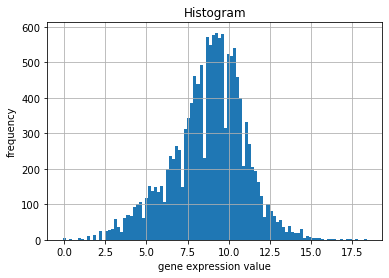

In [25]:
import matplotlib.pyplot as plt
sample = data_m[:, 3].T
import matplotlib.pyplot as plt

_ = plt.hist(sample, bins=100)
plt.xlabel("gene expression value")
plt.ylabel("frequency")
plt.title("Histogram")
plt.grid(True)
plt.show()

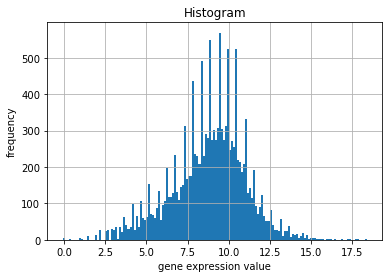

In [26]:
import matplotlib.pyplot as plt
sample = data_m[:, 3].T
_ = plt.hist(sample, bins= 150)
plt.xlabel("gene expression value")
plt.ylabel("frequency")
plt.title("Histogram")
plt.grid(True)
plt.show()

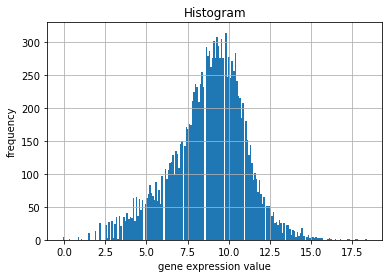

In [27]:
import matplotlib.pyplot as plt
sample = data_m[:, 3].T
_ = plt.hist(sample, bins=200)
plt.xlabel("gene expression value")
plt.ylabel("frequency")
plt.title("Histogram")
plt.grid(True)
plt.show()

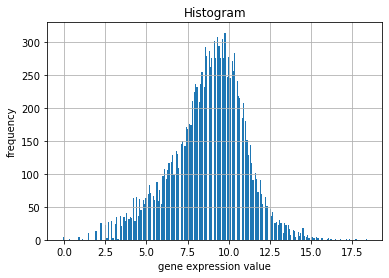

In [28]:
import matplotlib.pyplot as plt
sample = data_m[:, 3].T
_ = plt.hist(sample, bins = 250)
plt.xlabel("gene expression value")
plt.ylabel("frequency")
plt.title("Histogram")
plt.grid(True)
plt.show()

### 2. Generate gene expression distribution for all samples. How is the distribution of gene expression across samples?

sample no.:  1


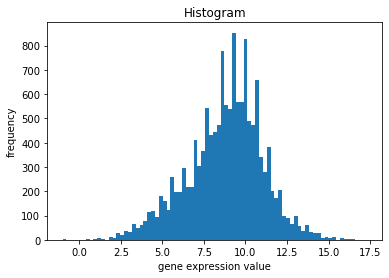

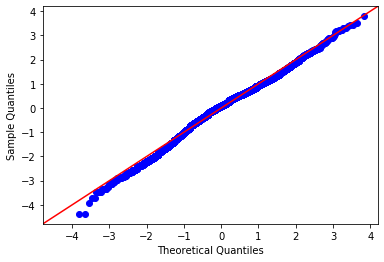

Statistics=282.984, p=0.000
Not a normal distribution
sample no.:  2


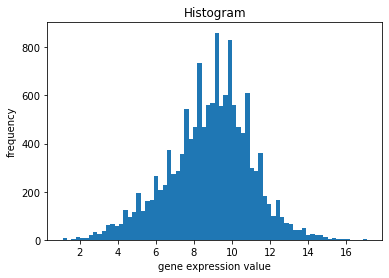

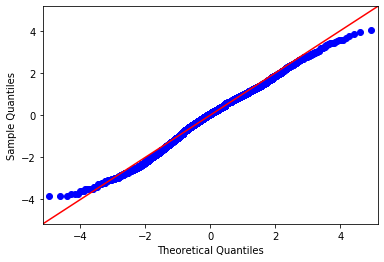

Statistics=215.735, p=0.000
Not a normal distribution
sample no.:  3


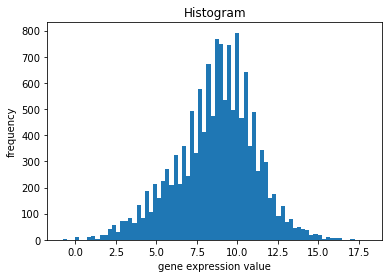

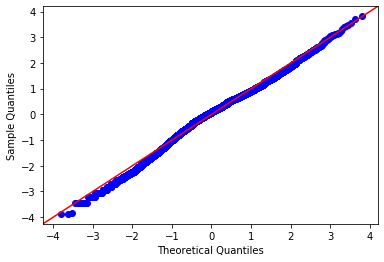

Statistics=286.250, p=0.000
Not a normal distribution
sample no.:  4


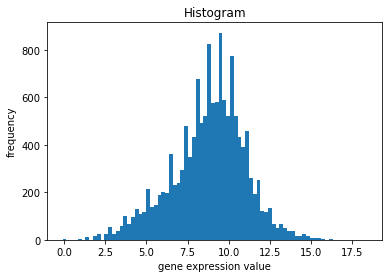

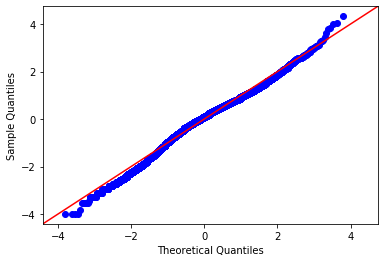

Statistics=389.162, p=0.000
Not a normal distribution
sample no.:  5


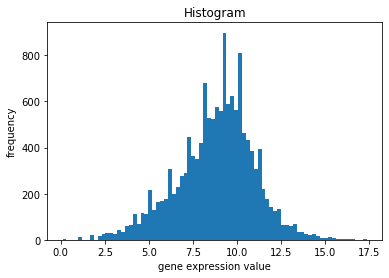

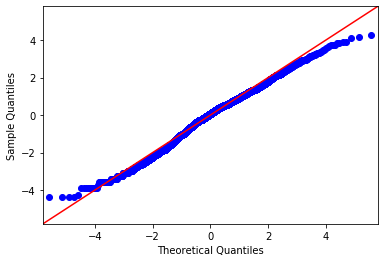

Statistics=344.204, p=0.000
Not a normal distribution
sample no.:  6


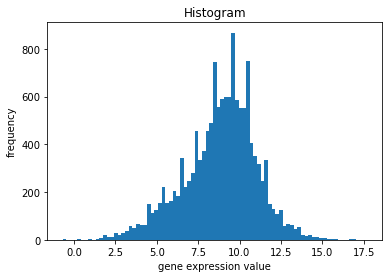

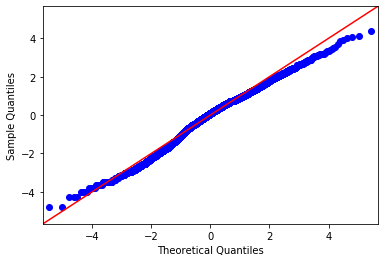

Statistics=455.128, p=0.000
Not a normal distribution
sample no.:  7


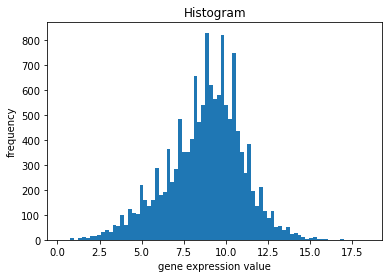

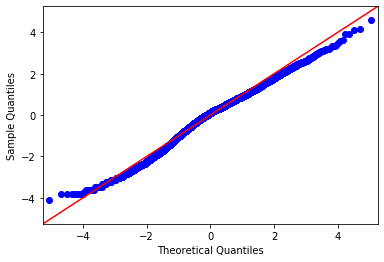

Statistics=348.287, p=0.000
Not a normal distribution
sample no.:  8


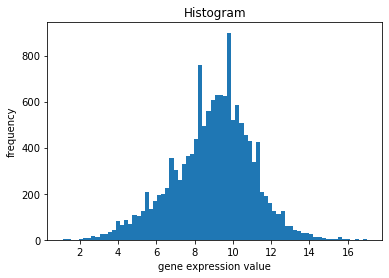

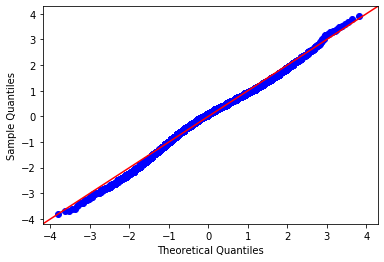

Statistics=265.804, p=0.000
Not a normal distribution
sample no.:  9


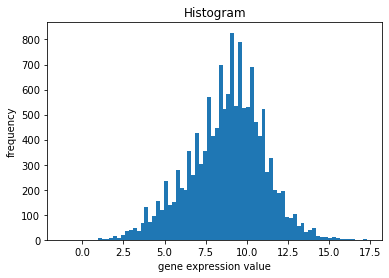

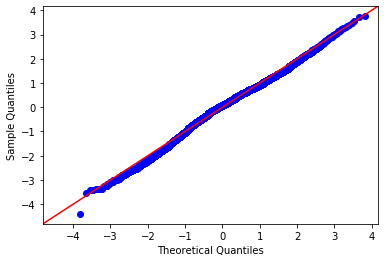

Statistics=212.957, p=0.000
Not a normal distribution
sample no.:  10


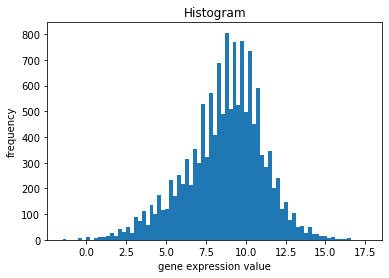

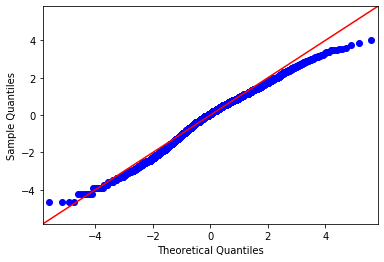

Statistics=513.505, p=0.000
Not a normal distribution
sample no.:  11


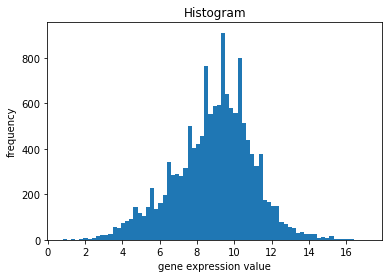

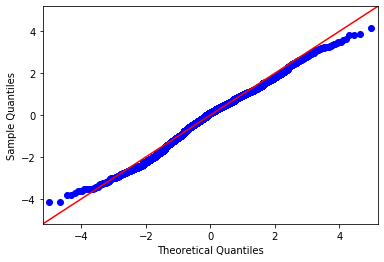

Statistics=263.062, p=0.000
Not a normal distribution
sample no.:  12


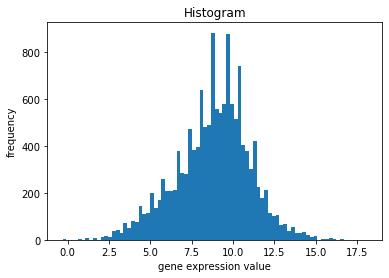

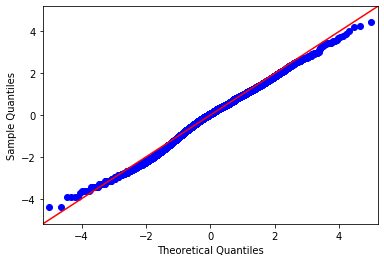

Statistics=238.900, p=0.000
Not a normal distribution
sample no.:  13


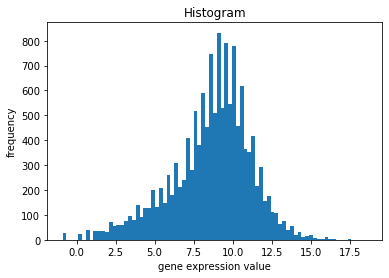

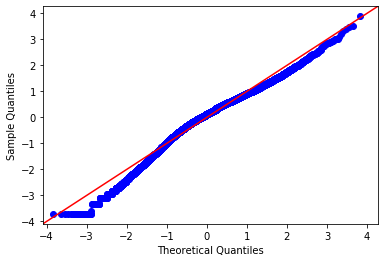

Statistics=944.602, p=0.000
Not a normal distribution
sample no.:  14


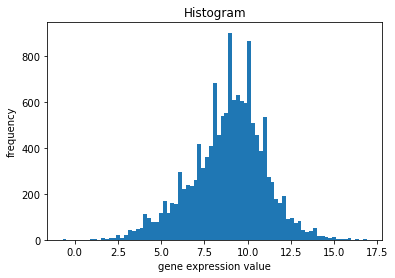

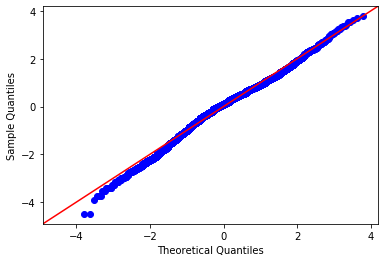

Statistics=334.183, p=0.000
Not a normal distribution
sample no.:  15


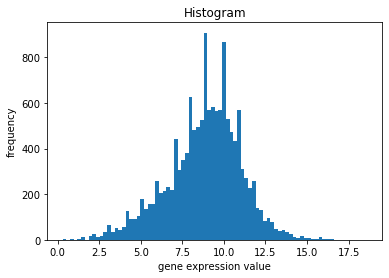

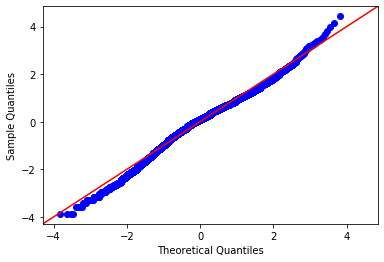

Statistics=423.048, p=0.000
Not a normal distribution
sample no.:  16


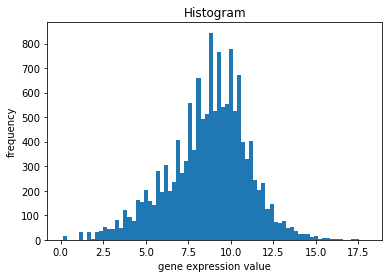

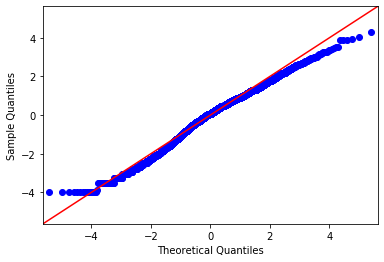

Statistics=443.533, p=0.000
Not a normal distribution
sample no.:  17


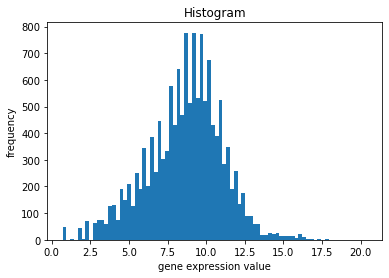

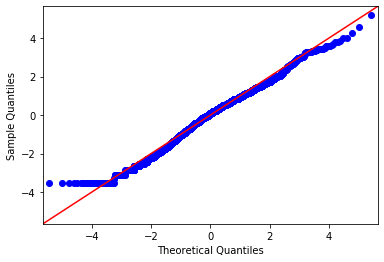

Statistics=265.659, p=0.000
Not a normal distribution
sample no.:  18


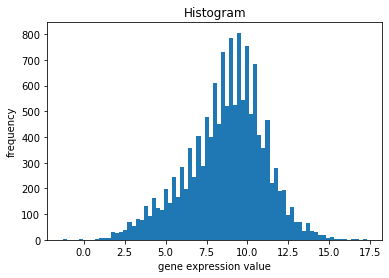

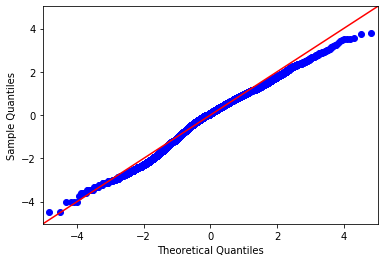

Statistics=405.720, p=0.000
Not a normal distribution
sample no.:  19


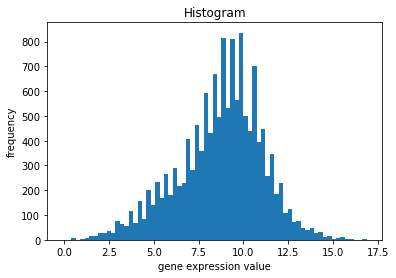

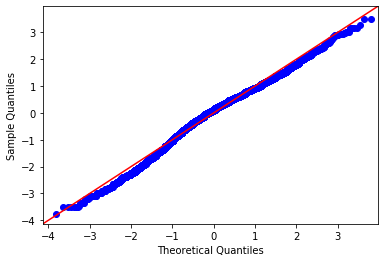

Statistics=383.026, p=0.000
Not a normal distribution
sample no.:  20


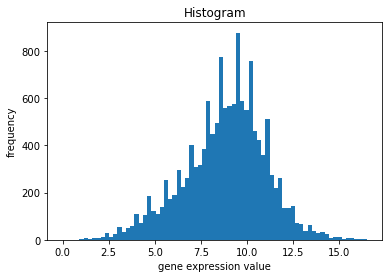

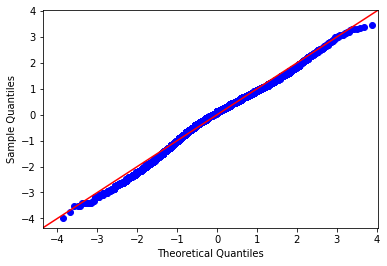

Statistics=303.733, p=0.000
Not a normal distribution
sample no.:  21


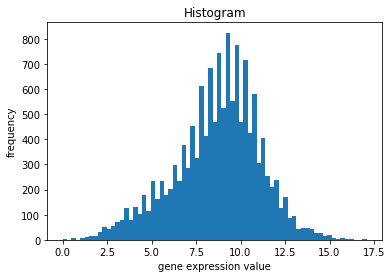

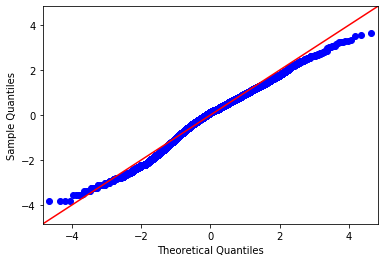

Statistics=351.095, p=0.000
Not a normal distribution
sample no.:  22


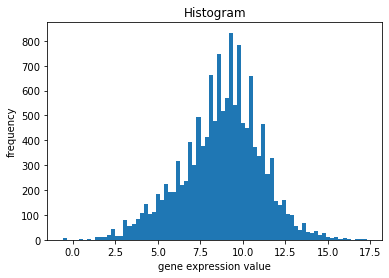

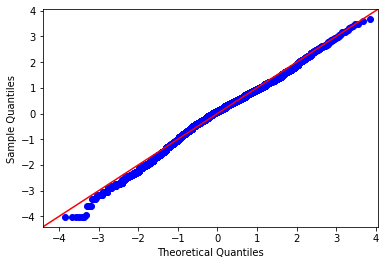

Statistics=268.001, p=0.000
Not a normal distribution
sample no.:  23


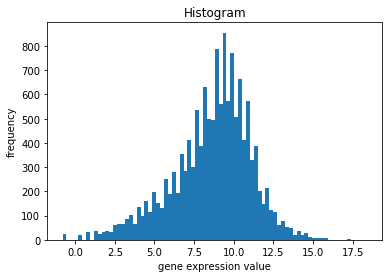

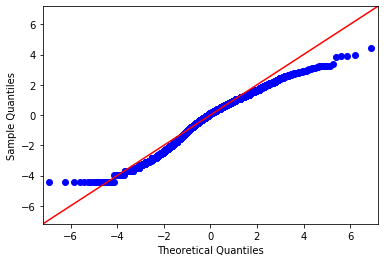

Statistics=911.698, p=0.000
Not a normal distribution
sample no.:  24


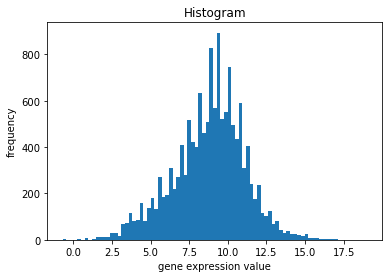

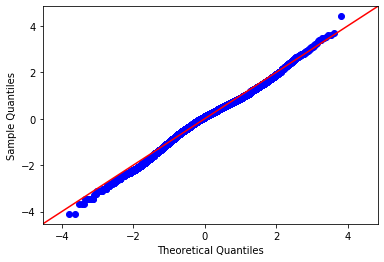

Statistics=255.346, p=0.000
Not a normal distribution
sample no.:  25


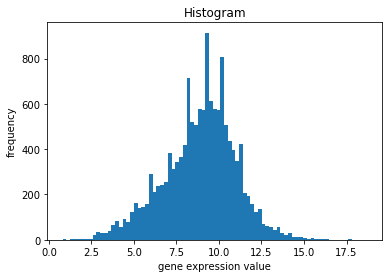

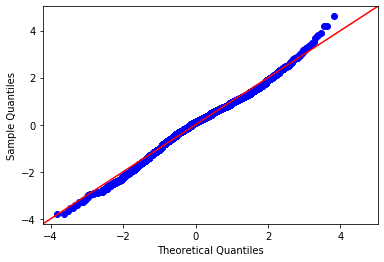

Statistics=252.095, p=0.000
Not a normal distribution
sample no.:  26


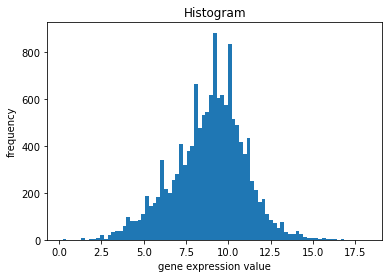

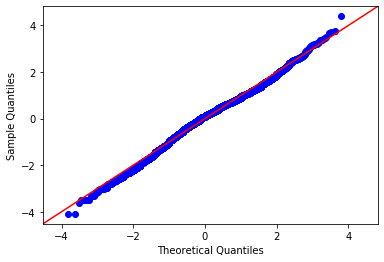

Statistics=232.213, p=0.000
Not a normal distribution
sample no.:  27


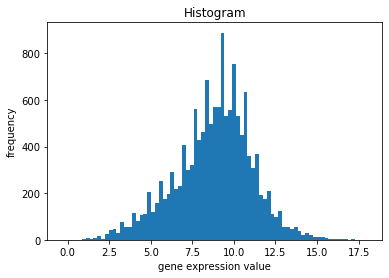

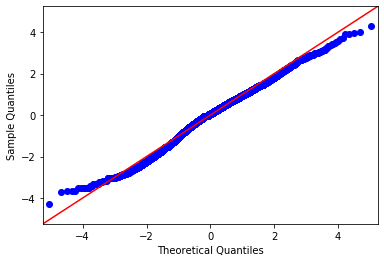

Statistics=246.750, p=0.000
Not a normal distribution
sample no.:  28


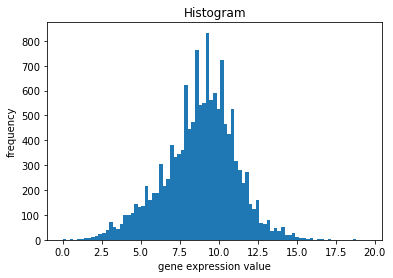

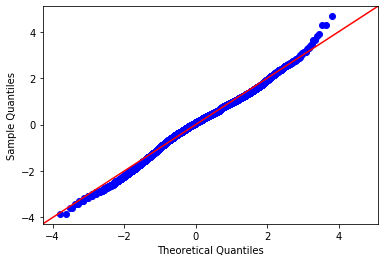

Statistics=241.667, p=0.000
Not a normal distribution
sample no.:  29


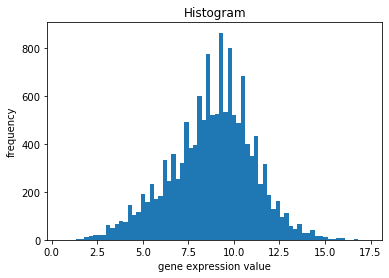

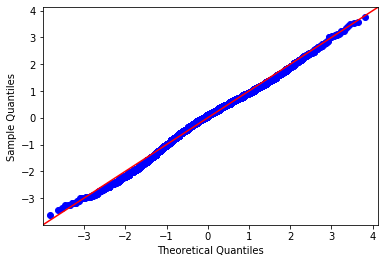

Statistics=173.381, p=0.000
Not a normal distribution
sample no.:  30


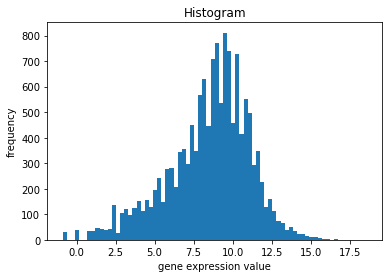

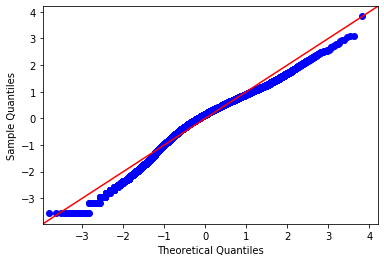

Statistics=910.685, p=0.000
Not a normal distribution
sample no.:  31


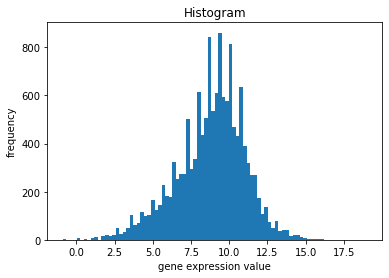

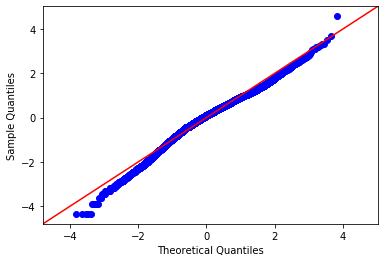

Statistics=626.445, p=0.000
Not a normal distribution
sample no.:  32


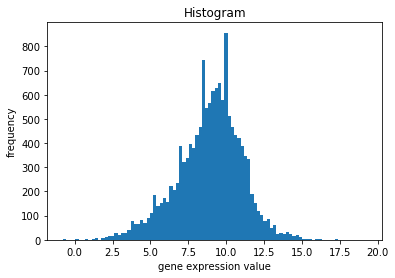

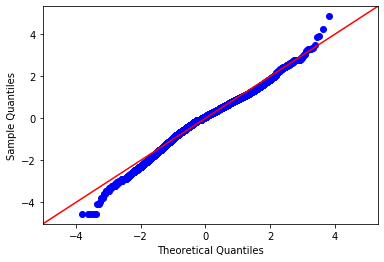

Statistics=485.190, p=0.000
Not a normal distribution
sample no.:  33


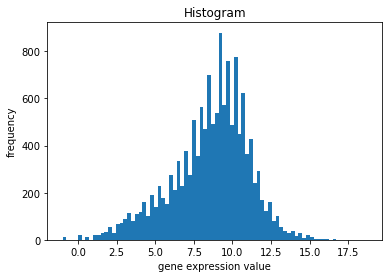

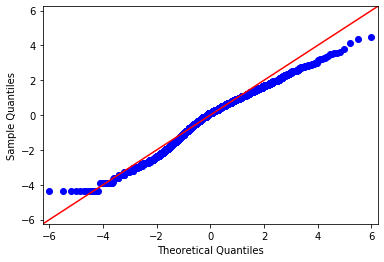

Statistics=766.031, p=0.000
Not a normal distribution
sample no.:  34


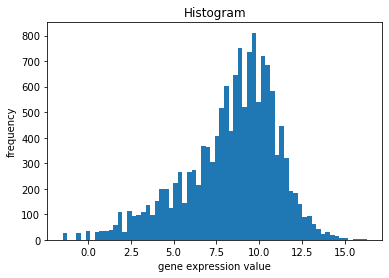

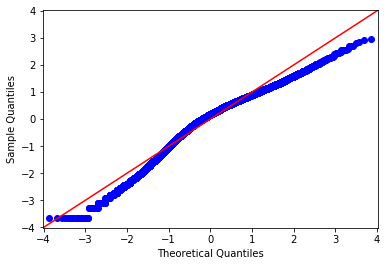

Statistics=1158.170, p=0.000
Not a normal distribution
sample no.:  35


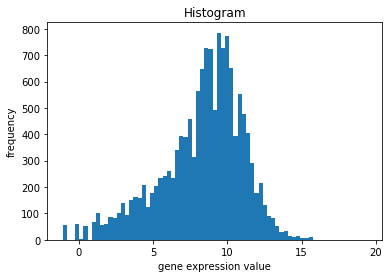

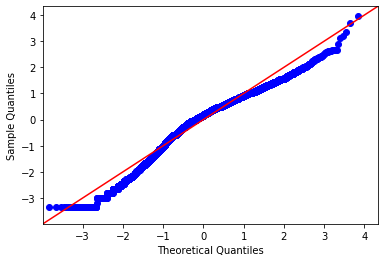

Statistics=1170.306, p=0.000
Not a normal distribution
sample no.:  36


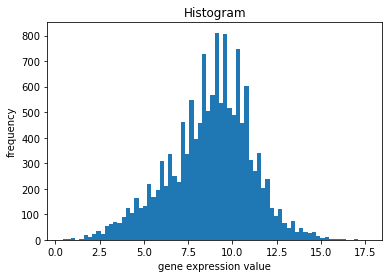

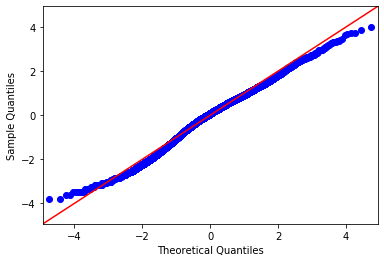

Statistics=253.422, p=0.000
Not a normal distribution
sample no.:  37


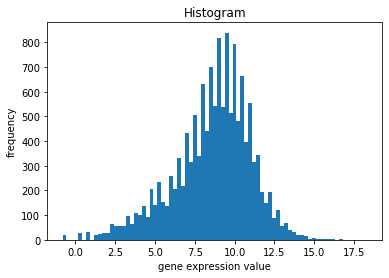

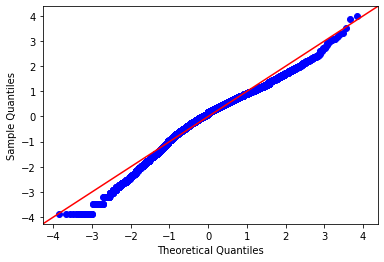

Statistics=981.650, p=0.000
Not a normal distribution
sample no.:  38


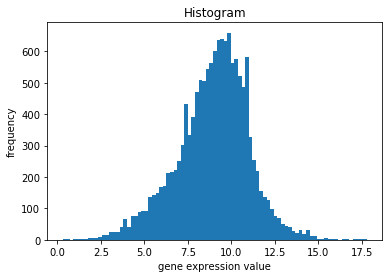

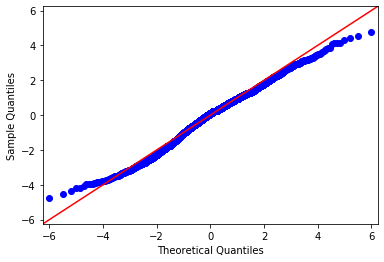

Statistics=367.093, p=0.000
Not a normal distribution
sample no.:  39


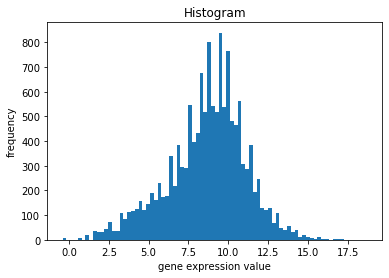

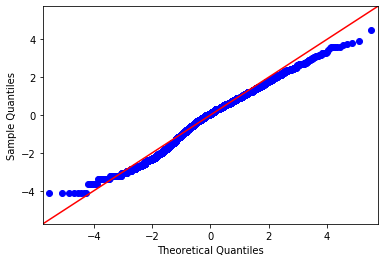

Statistics=416.415, p=0.000
Not a normal distribution
sample no.:  40


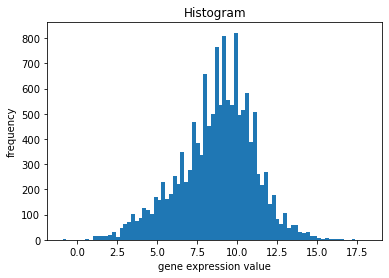

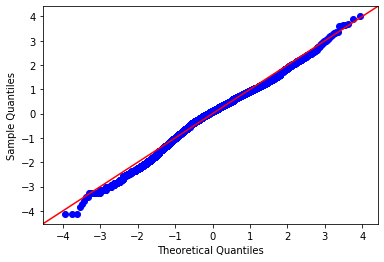

Statistics=381.883, p=0.000
Not a normal distribution
sample no.:  41


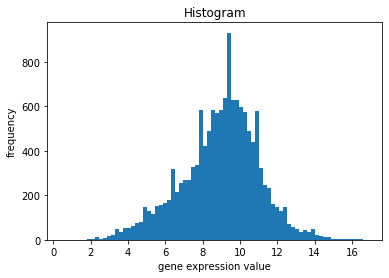

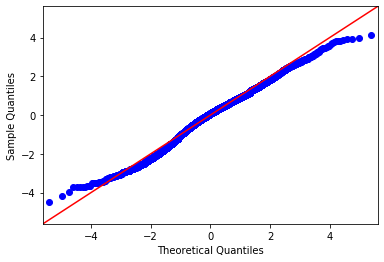

Statistics=275.241, p=0.000
Not a normal distribution
sample no.:  42


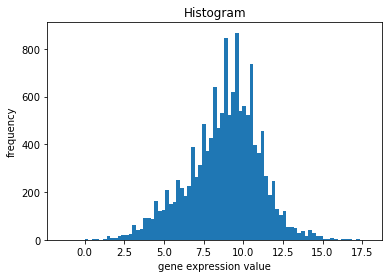

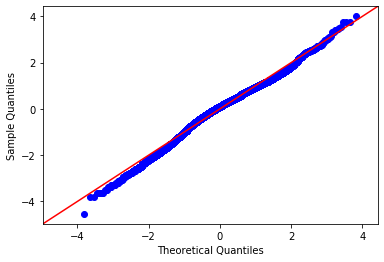

Statistics=360.917, p=0.000
Not a normal distribution
sample no.:  43


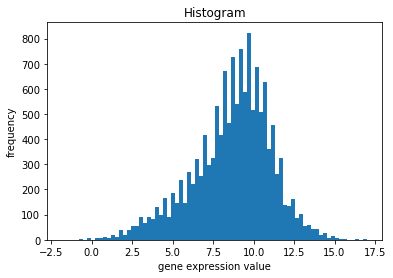

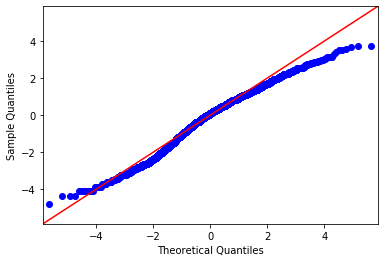

Statistics=661.284, p=0.000
Not a normal distribution
sample no.:  44


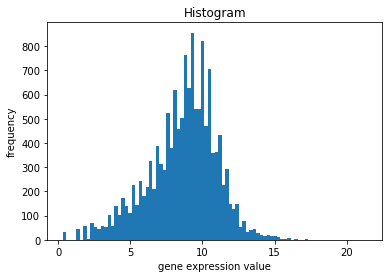

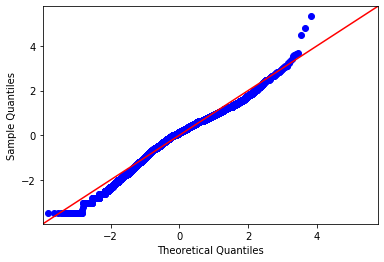

Statistics=639.020, p=0.000
Not a normal distribution
sample no.:  45


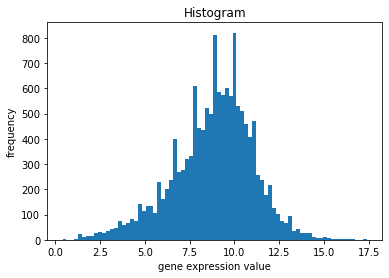

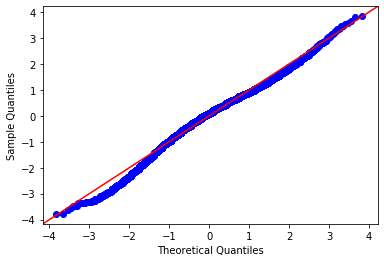

Statistics=505.676, p=0.000
Not a normal distribution
sample no.:  46


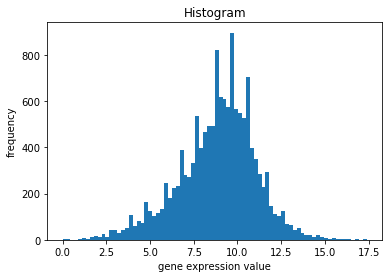

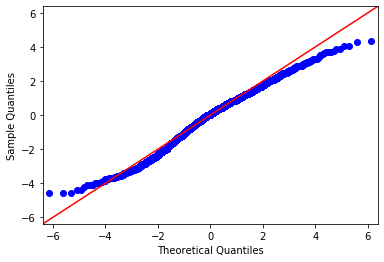

Statistics=527.659, p=0.000
Not a normal distribution
sample no.:  47


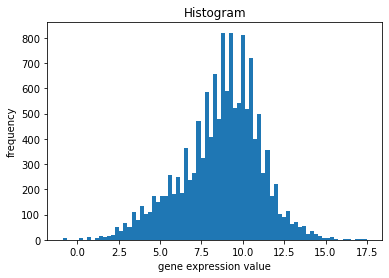

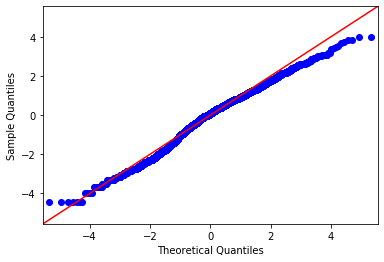

Statistics=504.989, p=0.000
Not a normal distribution
sample no.:  48


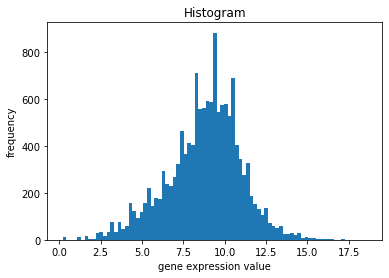

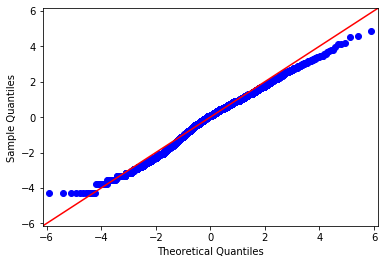

Statistics=413.258, p=0.000
Not a normal distribution
sample no.:  49


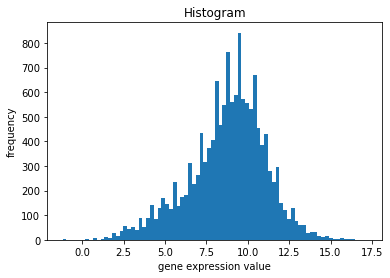

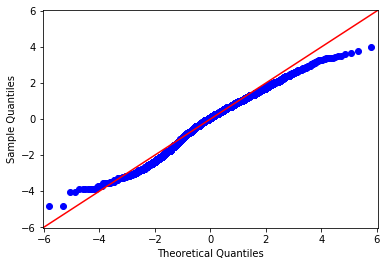

Statistics=521.903, p=0.000
Not a normal distribution
sample no.:  50


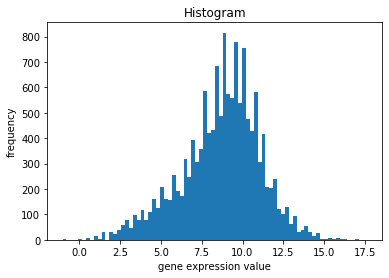

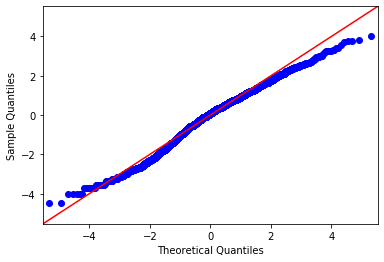

Statistics=471.843, p=0.000
Not a normal distribution
sample no.:  51


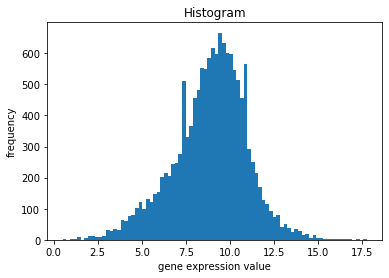

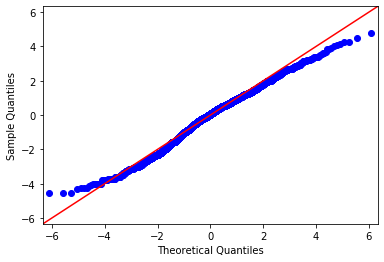

Statistics=423.659, p=0.000
Not a normal distribution
sample no.:  52


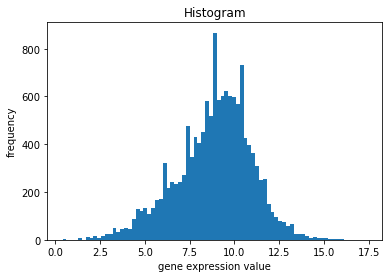

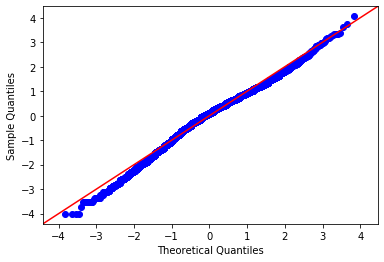

Statistics=422.841, p=0.000
Not a normal distribution
sample no.:  53


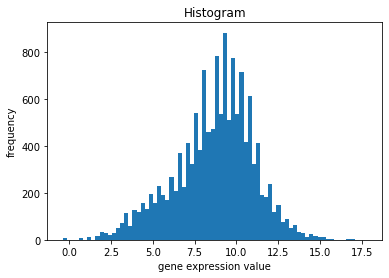

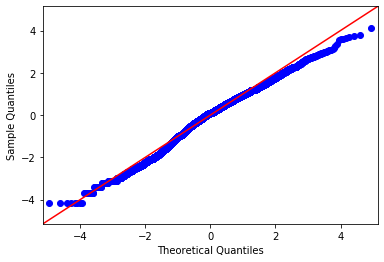

Statistics=407.515, p=0.000
Not a normal distribution
sample no.:  54


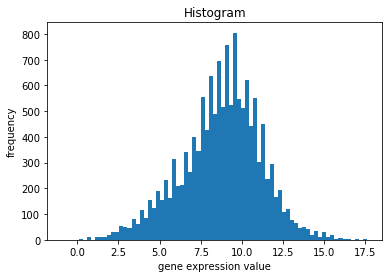

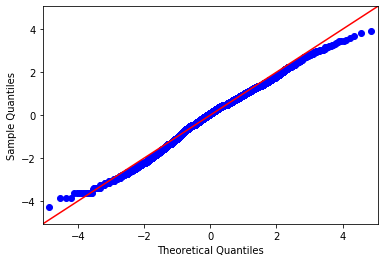

Statistics=247.827, p=0.000
Not a normal distribution
sample no.:  55


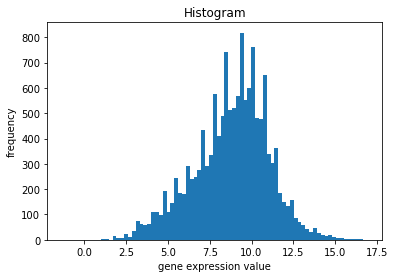

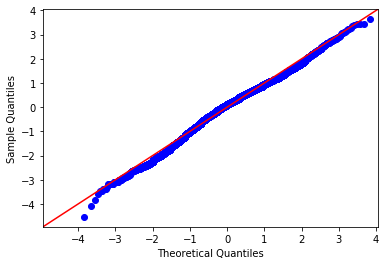

Statistics=282.185, p=0.000
Not a normal distribution
sample no.:  56


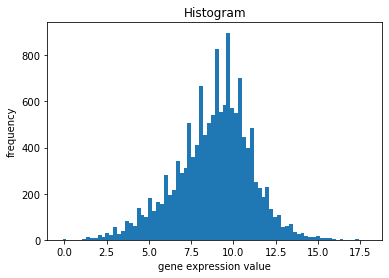

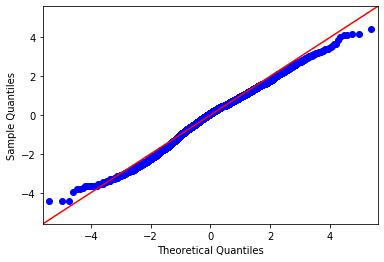

Statistics=318.265, p=0.000
Not a normal distribution
sample no.:  57


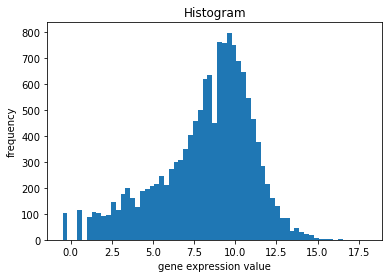

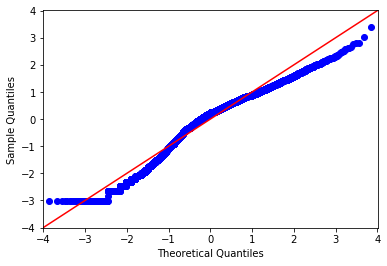

Statistics=1030.213, p=0.000
Not a normal distribution
sample no.:  58


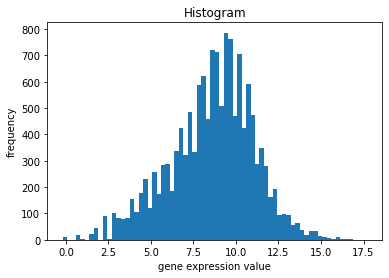

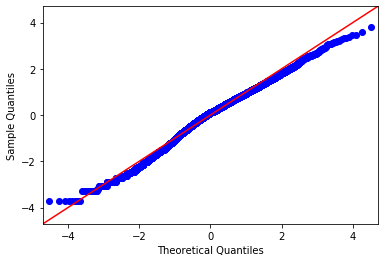

Statistics=299.608, p=0.000
Not a normal distribution
sample no.:  59


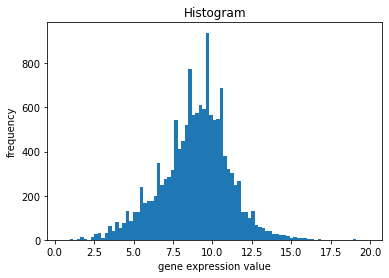

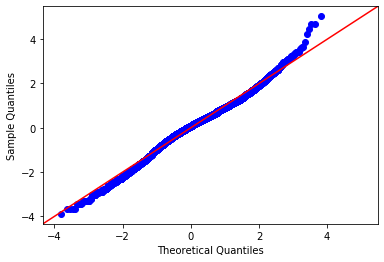

Statistics=259.510, p=0.000
Not a normal distribution
sample no.:  60


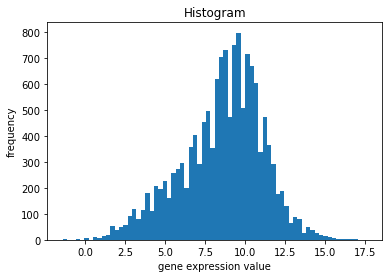

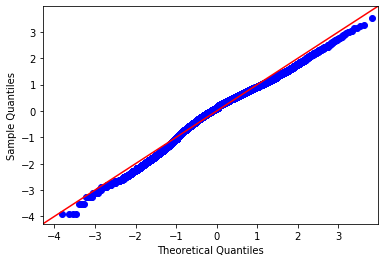

Statistics=446.950, p=0.000
Not a normal distribution
sample no.:  61


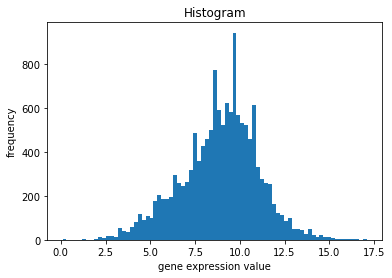

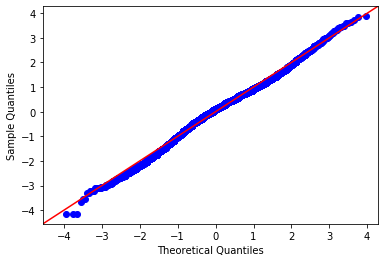

Statistics=205.731, p=0.000
Not a normal distribution
sample no.:  62


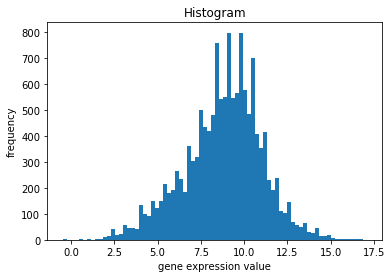

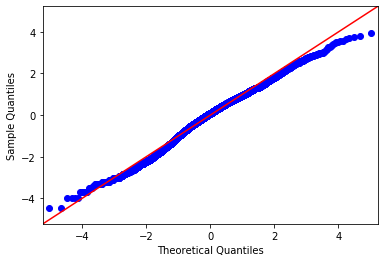

Statistics=272.350, p=0.000
Not a normal distribution
sample no.:  63


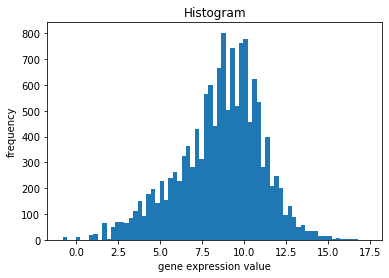

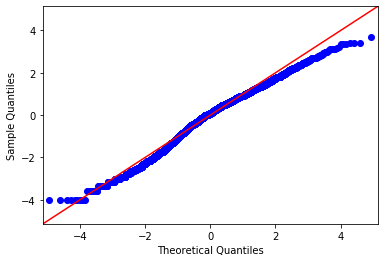

Statistics=513.149, p=0.000
Not a normal distribution
sample no.:  64


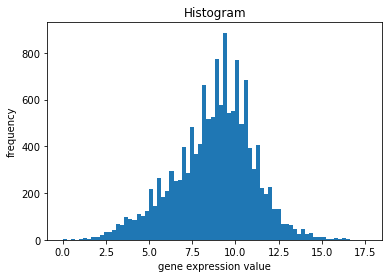

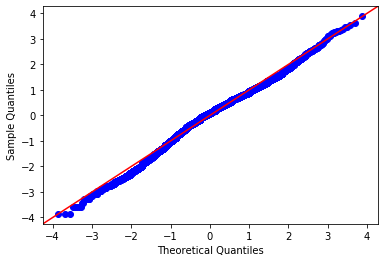

Statistics=314.788, p=0.000
Not a normal distribution
sample no.:  65


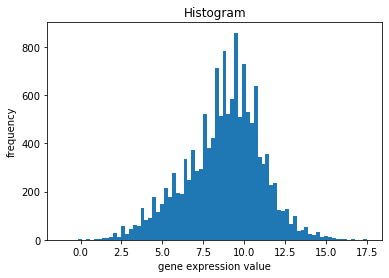

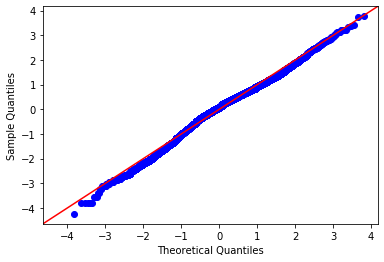

Statistics=277.936, p=0.000
Not a normal distribution
sample no.:  66


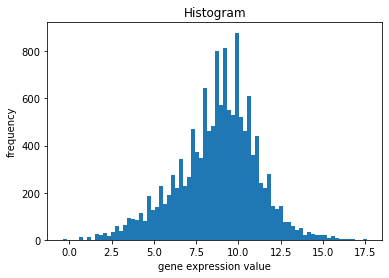

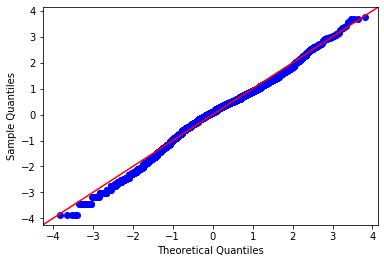

Statistics=370.963, p=0.000
Not a normal distribution
sample no.:  67


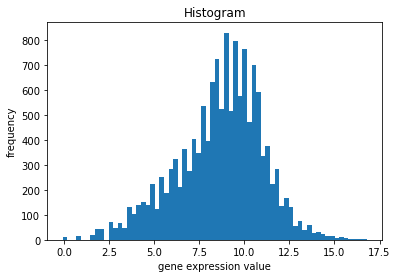

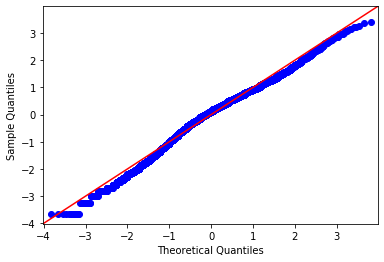

Statistics=434.304, p=0.000
Not a normal distribution
sample no.:  68


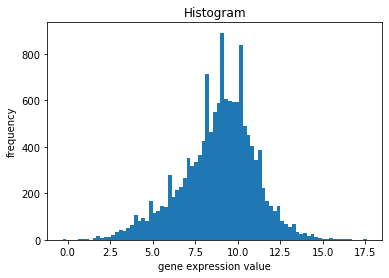

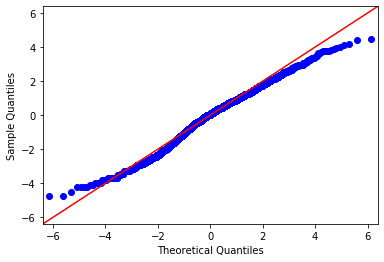

Statistics=478.246, p=0.000
Not a normal distribution
sample no.:  69


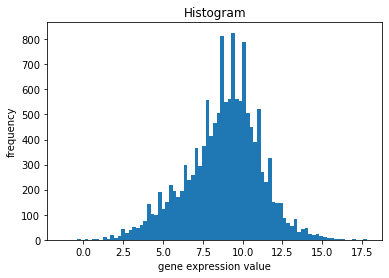

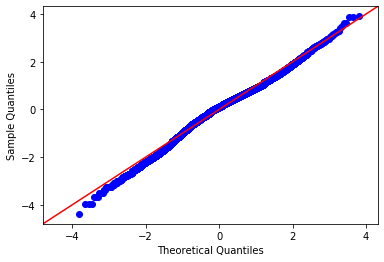

Statistics=331.400, p=0.000
Not a normal distribution
sample no.:  70


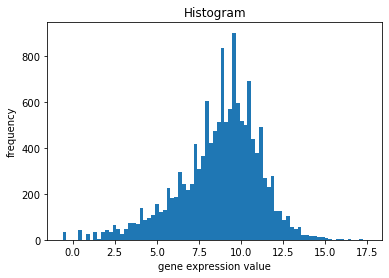

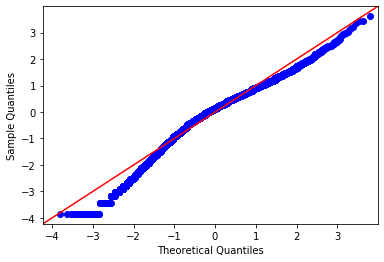

Statistics=1263.515, p=0.000
Not a normal distribution
sample no.:  71


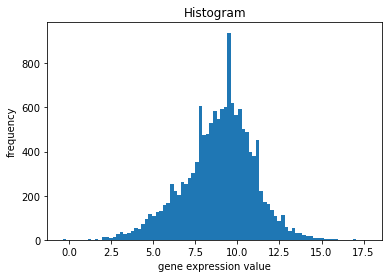

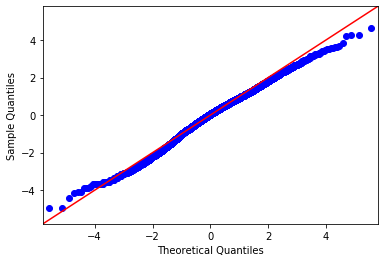

Statistics=346.467, p=0.000
Not a normal distribution
sample no.:  72


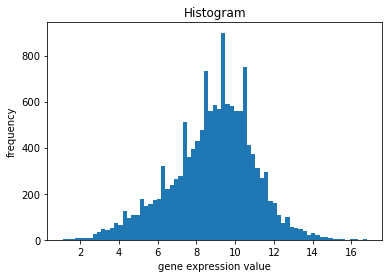

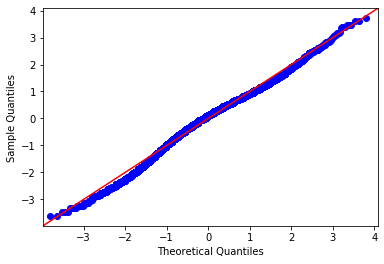

Statistics=327.734, p=0.000
Not a normal distribution
sample no.:  73


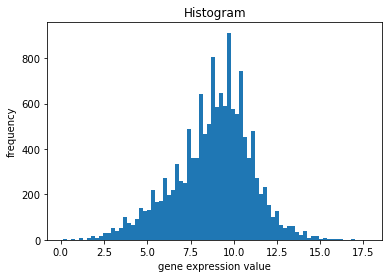

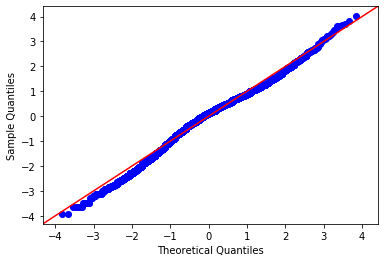

Statistics=429.906, p=0.000
Not a normal distribution
sample no.:  74


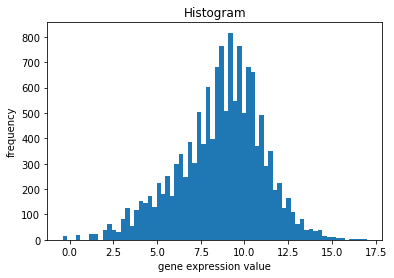

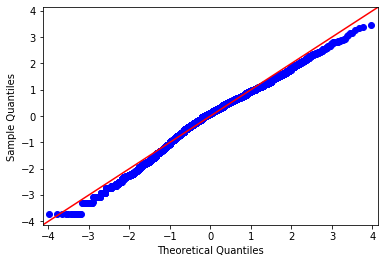

Statistics=432.528, p=0.000
Not a normal distribution
sample no.:  75


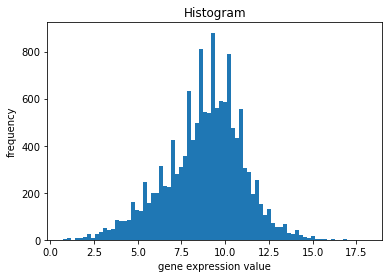

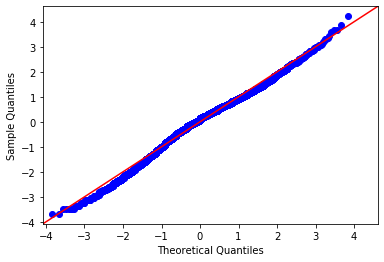

Statistics=313.709, p=0.000
Not a normal distribution
sample no.:  76


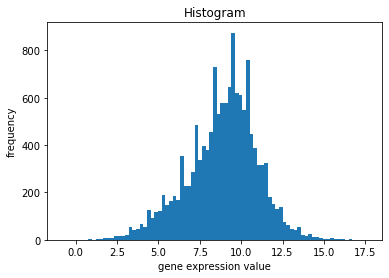

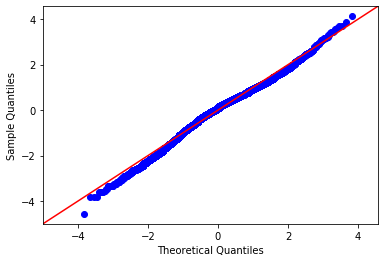

Statistics=360.203, p=0.000
Not a normal distribution
sample no.:  77


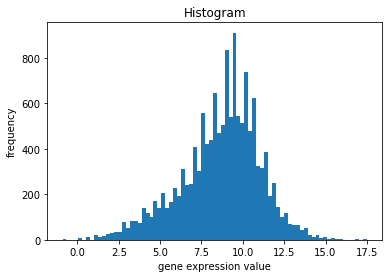

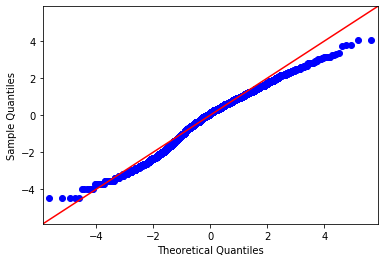

Statistics=620.869, p=0.000
Not a normal distribution
sample no.:  78


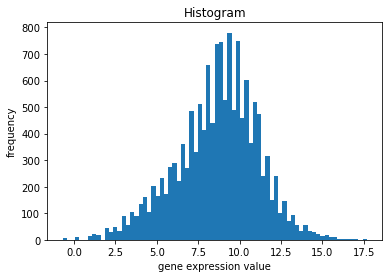

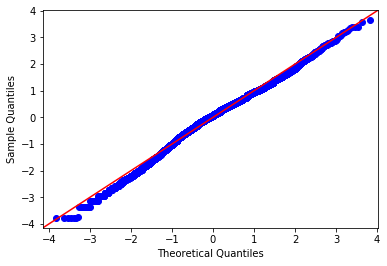

Statistics=281.070, p=0.000
Not a normal distribution
sample no.:  79


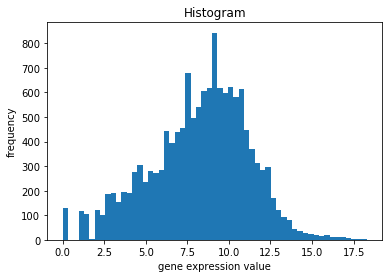

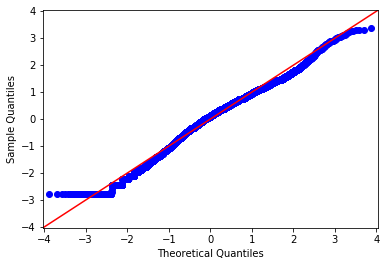

Statistics=259.270, p=0.000
Not a normal distribution
sample no.:  80


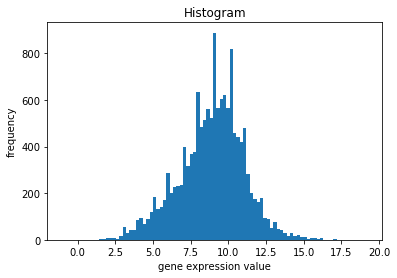

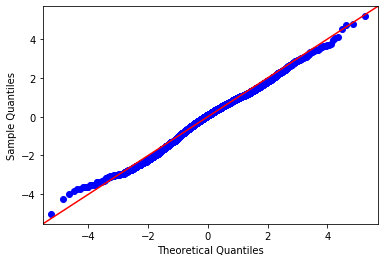

Statistics=210.301, p=0.000
Not a normal distribution
sample no.:  81


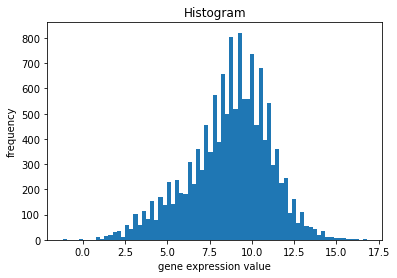

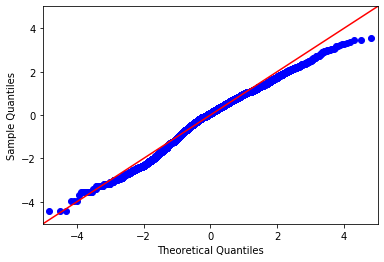

Statistics=491.170, p=0.000
Not a normal distribution
sample no.:  82


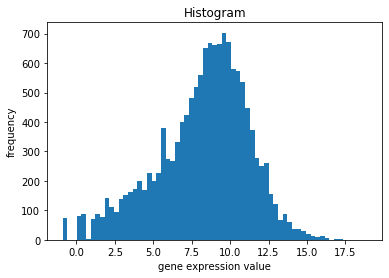

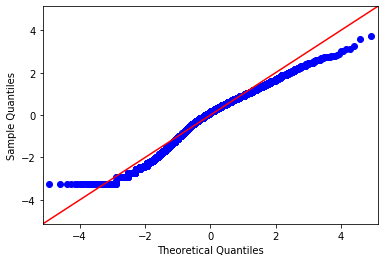

Statistics=677.390, p=0.000
Not a normal distribution
sample no.:  83


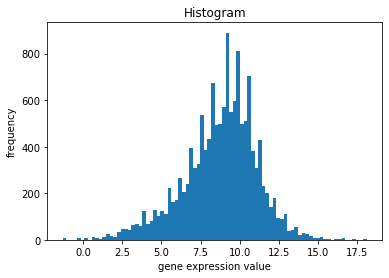

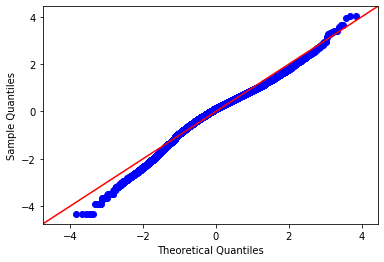

Statistics=751.102, p=0.000
Not a normal distribution
sample no.:  84


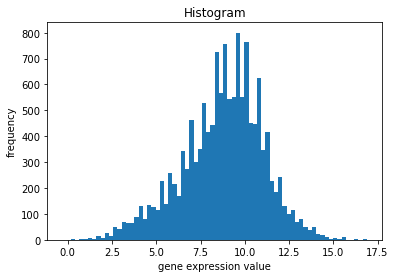

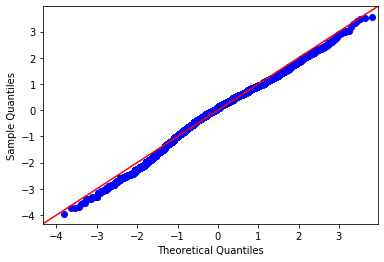

Statistics=359.288, p=0.000
Not a normal distribution
sample no.:  85


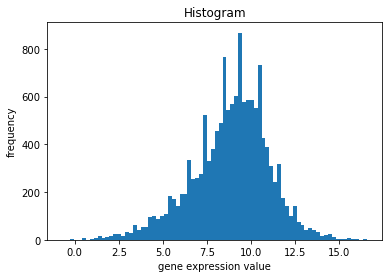

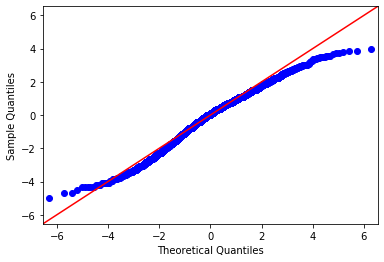

Statistics=615.836, p=0.000
Not a normal distribution
sample no.:  86


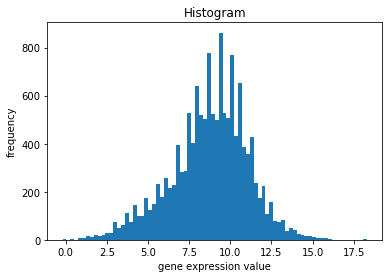

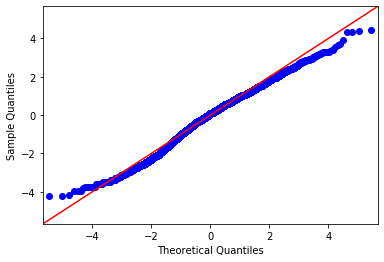

Statistics=387.837, p=0.000
Not a normal distribution
sample no.:  87


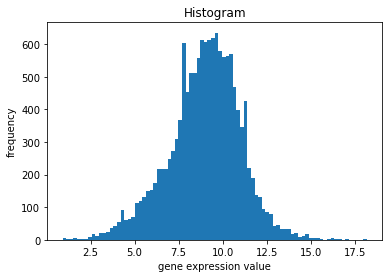

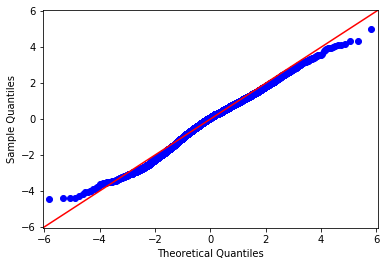

Statistics=314.082, p=0.000
Not a normal distribution
sample no.:  88


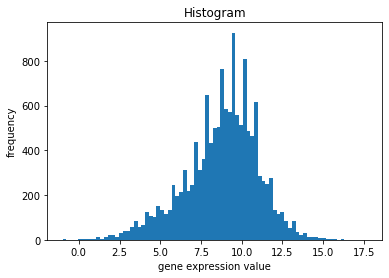

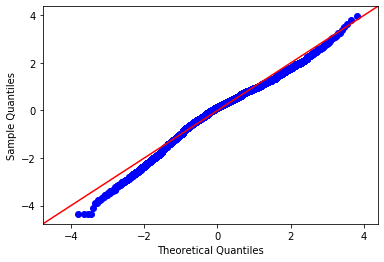

Statistics=717.319, p=0.000
Not a normal distribution
sample no.:  89


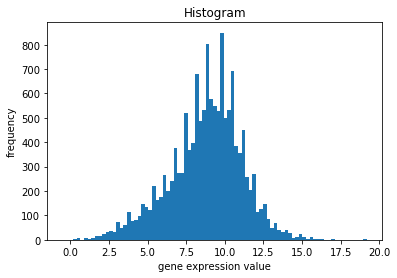

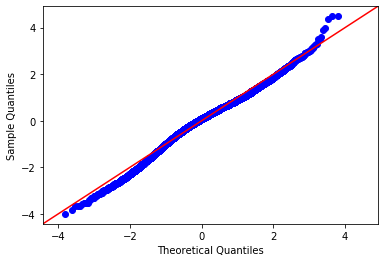

Statistics=399.173, p=0.000
Not a normal distribution
sample no.:  90


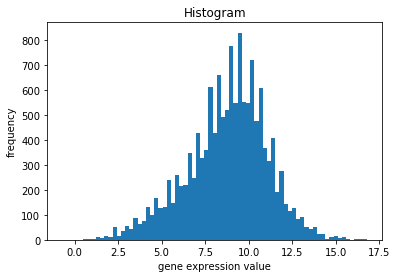

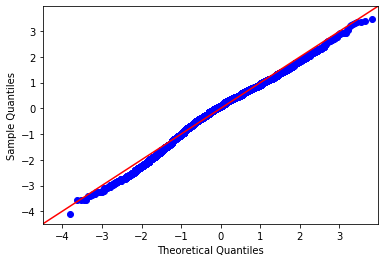

Statistics=360.296, p=0.000
Not a normal distribution
sample no.:  91


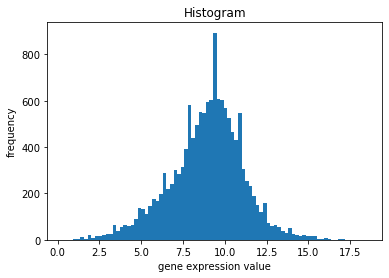

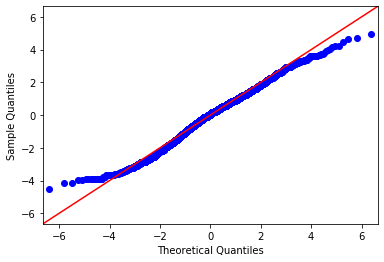

Statistics=295.558, p=0.000
Not a normal distribution
sample no.:  92


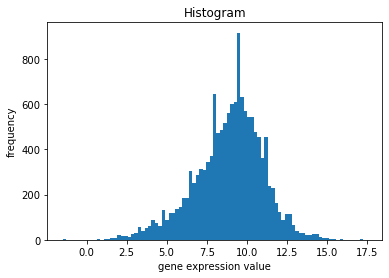

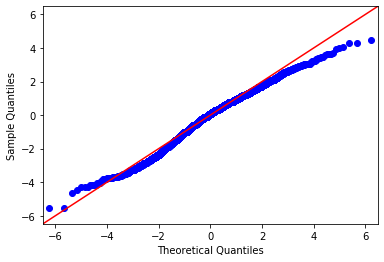

Statistics=564.829, p=0.000
Not a normal distribution
sample no.:  93


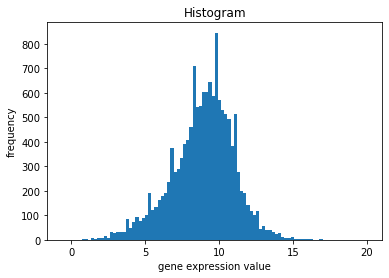

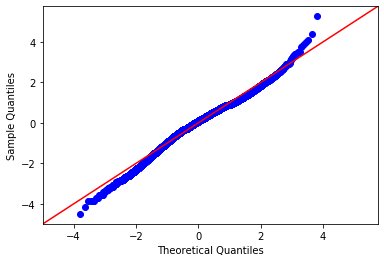

Statistics=478.223, p=0.000
Not a normal distribution
sample no.:  94


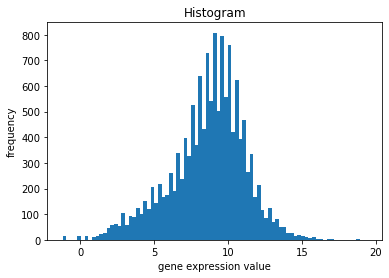

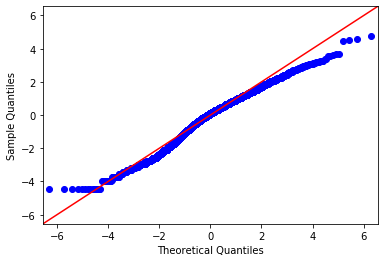

Statistics=669.125, p=0.000
Not a normal distribution
sample no.:  95


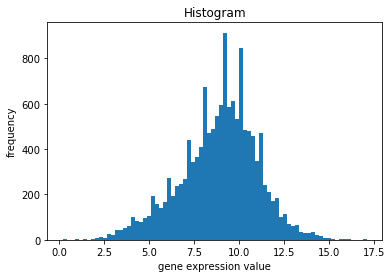

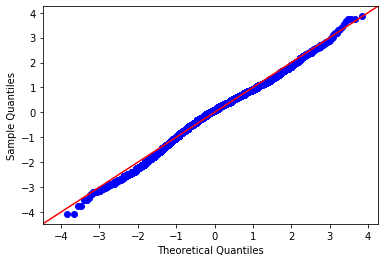

Statistics=291.372, p=0.000
Not a normal distribution
sample no.:  96


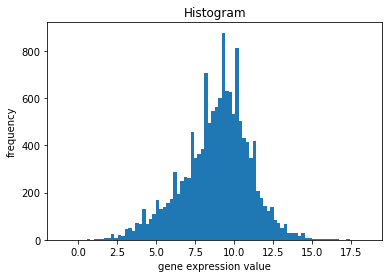

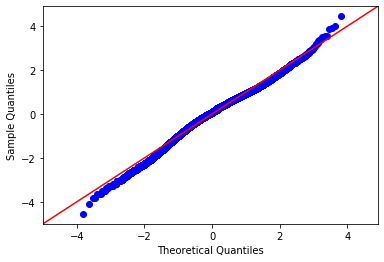

Statistics=414.878, p=0.000
Not a normal distribution
sample no.:  97


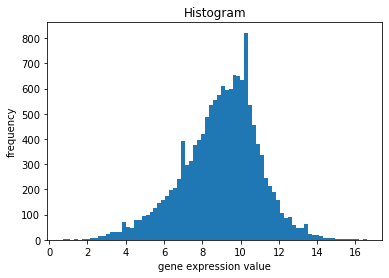

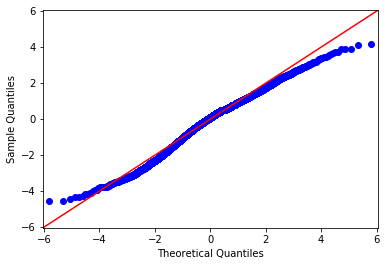

Statistics=485.329, p=0.000
Not a normal distribution
sample no.:  98


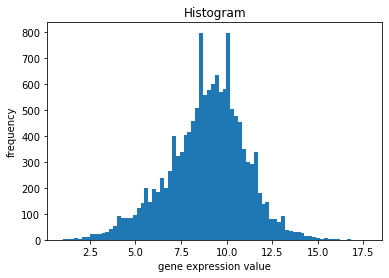

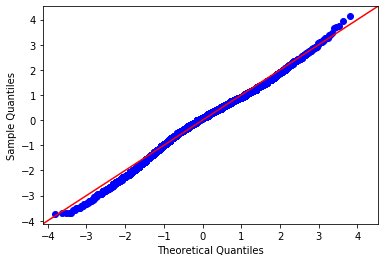

Statistics=304.034, p=0.000
Not a normal distribution
sample no.:  99


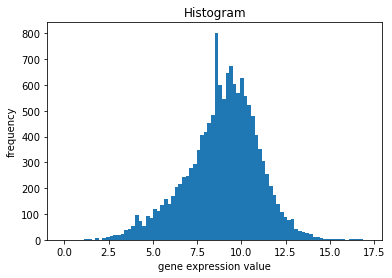

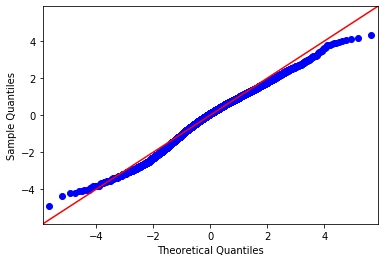

Statistics=444.549, p=0.000
Not a normal distribution
sample no.:  100


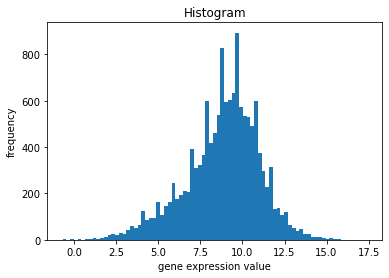

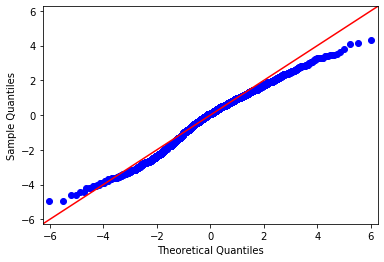

Statistics=642.280, p=0.000
Not a normal distribution
sample no.:  101


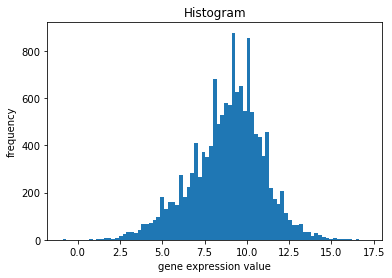

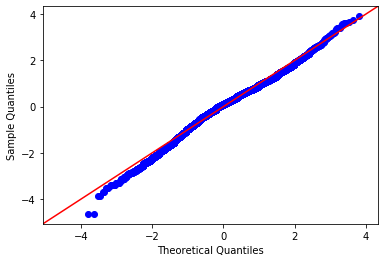

Statistics=354.579, p=0.000
Not a normal distribution
sample no.:  102


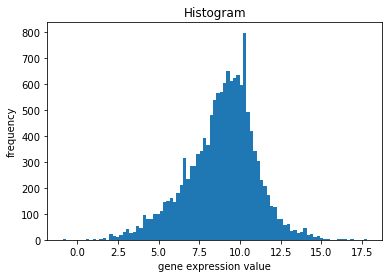

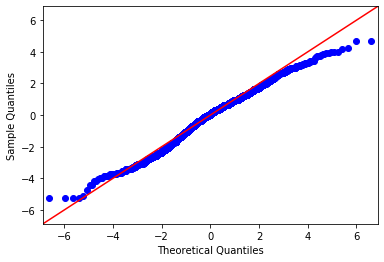

Statistics=492.758, p=0.000
Not a normal distribution
sample no.:  103


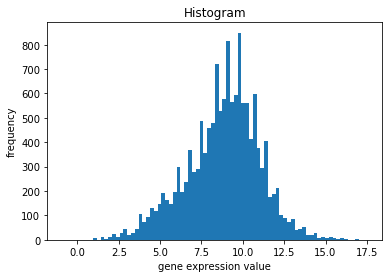

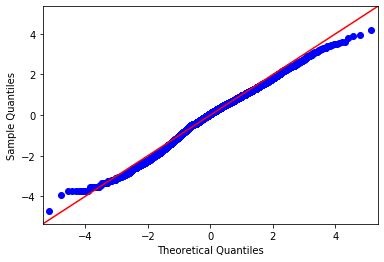

Statistics=295.678, p=0.000
Not a normal distribution
sample no.:  104


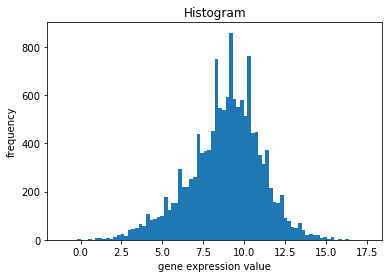

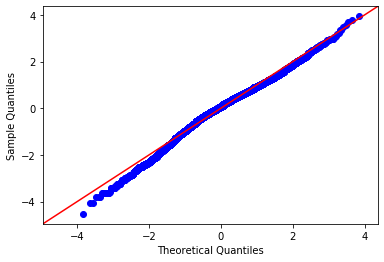

Statistics=440.056, p=0.000
Not a normal distribution
sample no.:  105


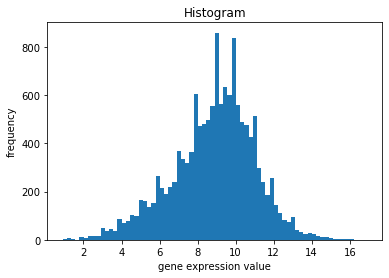

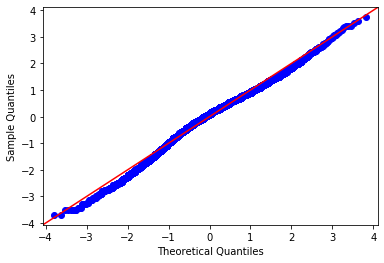

Statistics=332.800, p=0.000
Not a normal distribution
sample no.:  106


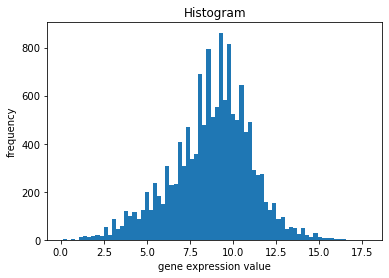

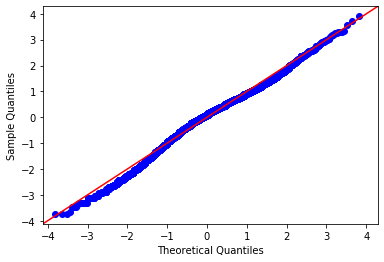

Statistics=374.979, p=0.000
Not a normal distribution
sample no.:  107


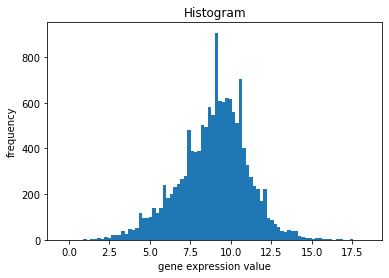

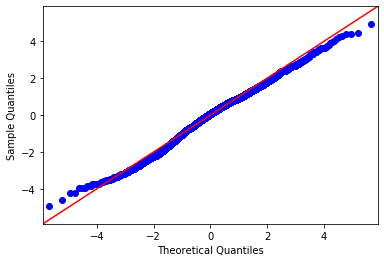

Statistics=309.755, p=0.000
Not a normal distribution
sample no.:  108


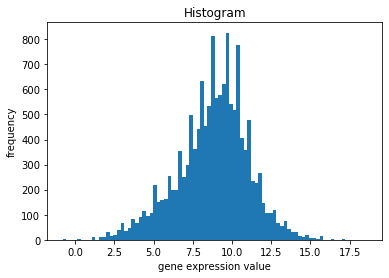

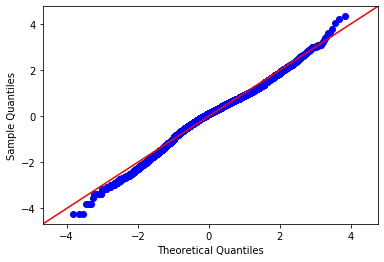

Statistics=388.635, p=0.000
Not a normal distribution
sample no.:  109


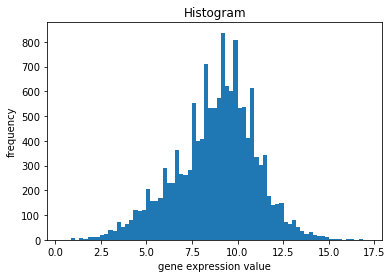

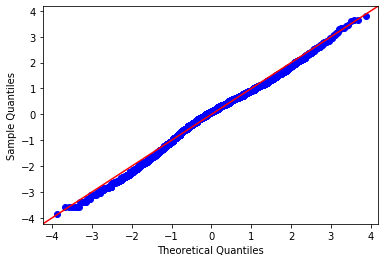

Statistics=293.023, p=0.000
Not a normal distribution
sample no.:  110


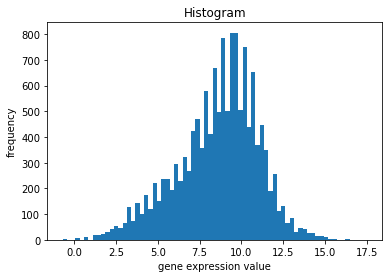

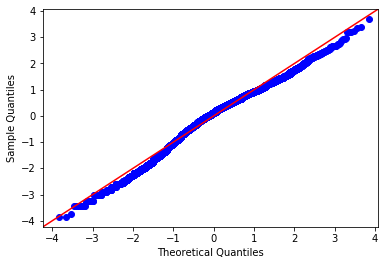

Statistics=492.989, p=0.000
Not a normal distribution
sample no.:  111


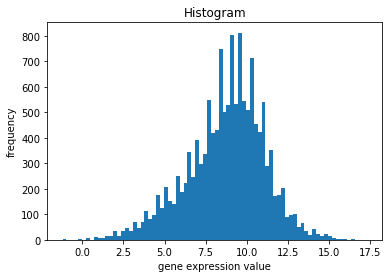

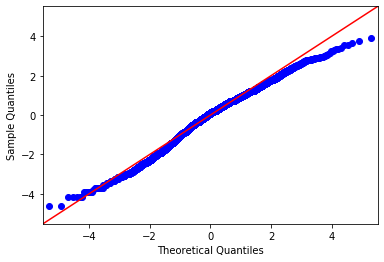

Statistics=472.682, p=0.000
Not a normal distribution
sample no.:  112


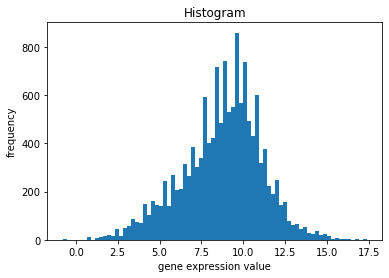

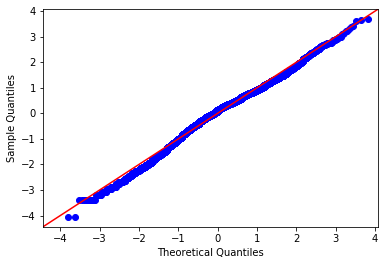

Statistics=293.889, p=0.000
Not a normal distribution
sample no.:  113


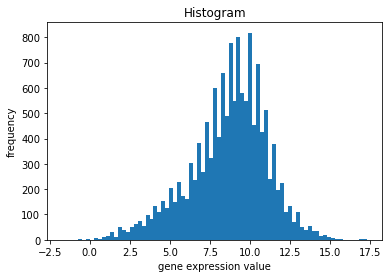

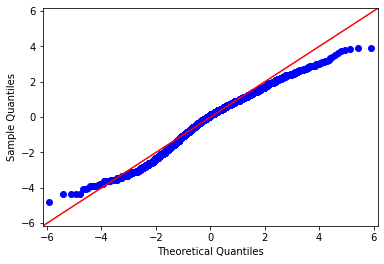

Statistics=654.610, p=0.000
Not a normal distribution
sample no.:  114


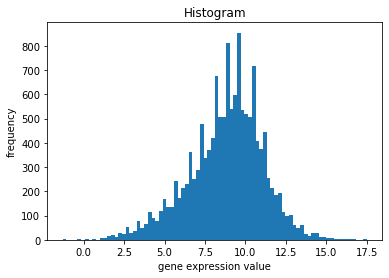

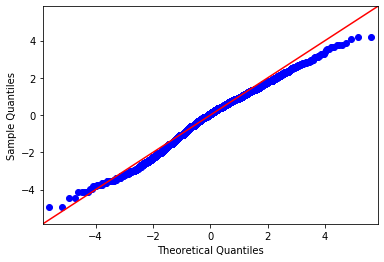

Statistics=491.257, p=0.000
Not a normal distribution
sample no.:  115


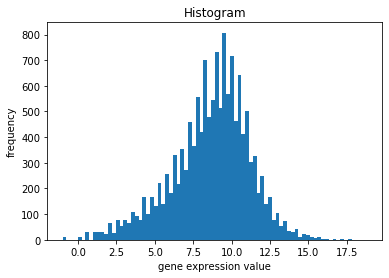

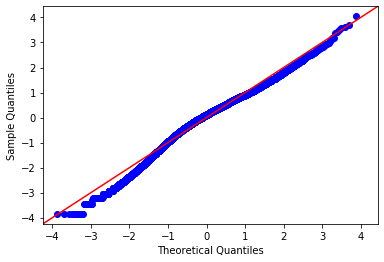

Statistics=681.740, p=0.000
Not a normal distribution
sample no.:  116


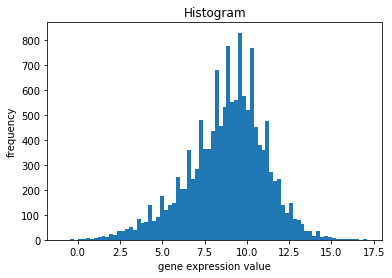

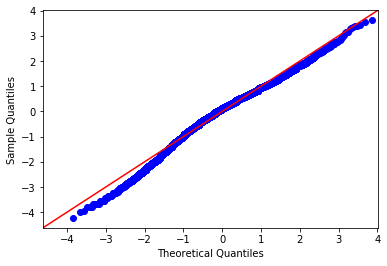

Statistics=587.542, p=0.000
Not a normal distribution
sample no.:  117


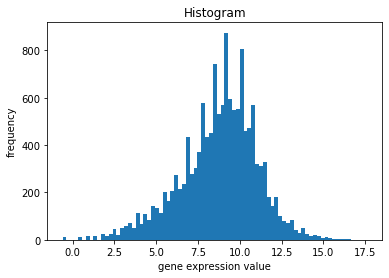

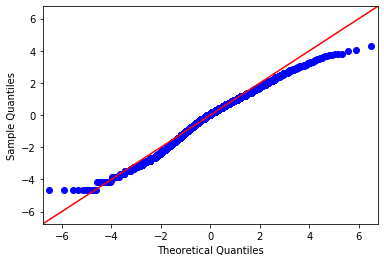

Statistics=614.394, p=0.000
Not a normal distribution
sample no.:  118


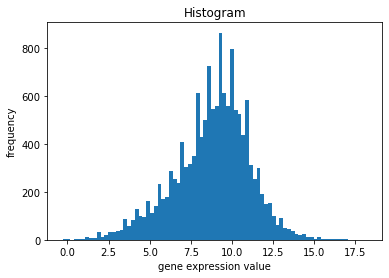

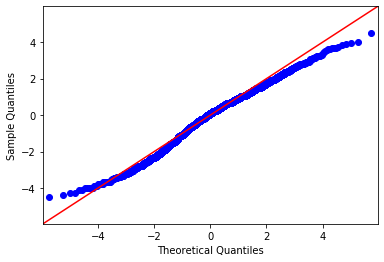

Statistics=506.666, p=0.000
Not a normal distribution
sample no.:  119


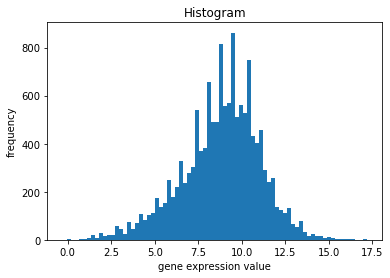

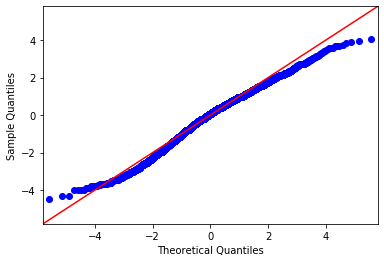

Statistics=477.529, p=0.000
Not a normal distribution
sample no.:  120


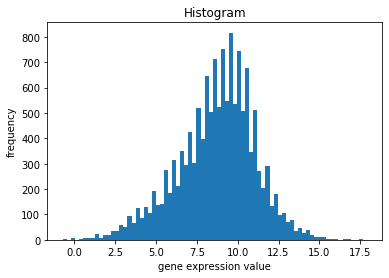

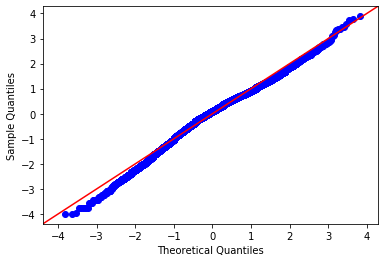

Statistics=422.008, p=0.000
Not a normal distribution
sample no.:  121


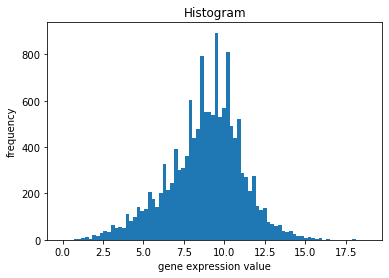

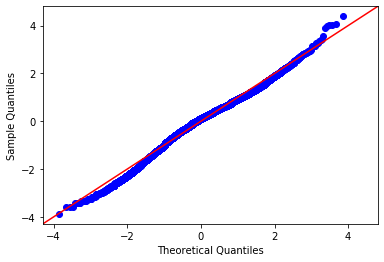

Statistics=357.044, p=0.000
Not a normal distribution
sample no.:  122


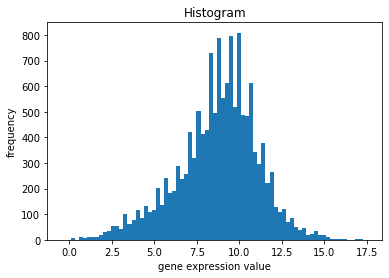

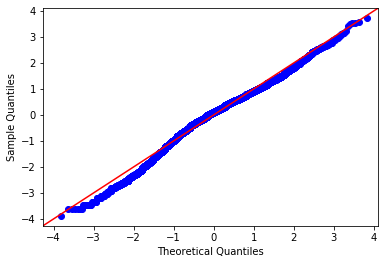

Statistics=510.817, p=0.000
Not a normal distribution
sample no.:  123


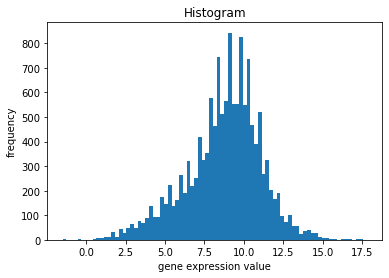

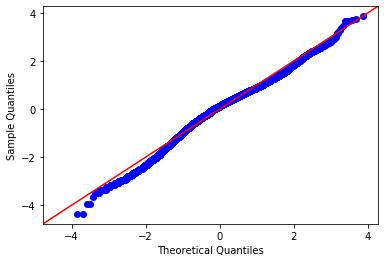

Statistics=542.545, p=0.000
Not a normal distribution
sample no.:  124


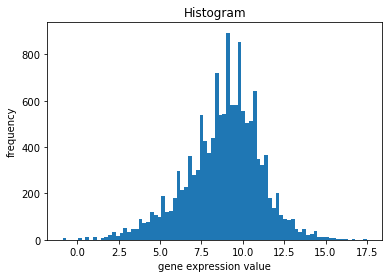

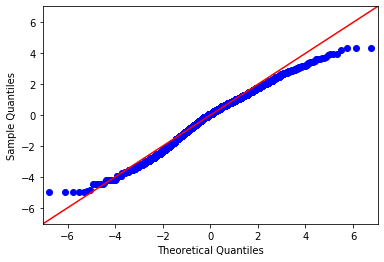

Statistics=640.152, p=0.000
Not a normal distribution
sample no.:  125


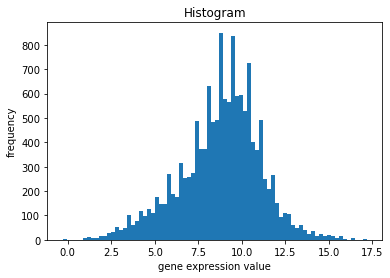

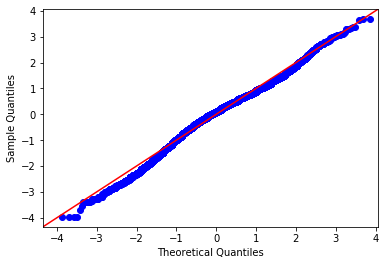

Statistics=402.682, p=0.000
Not a normal distribution
sample no.:  126


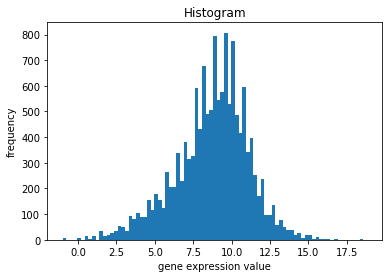

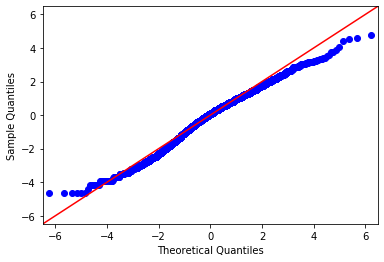

Statistics=564.800, p=0.000
Not a normal distribution
sample no.:  127


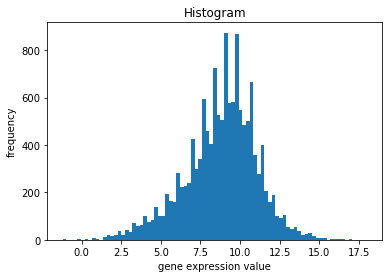

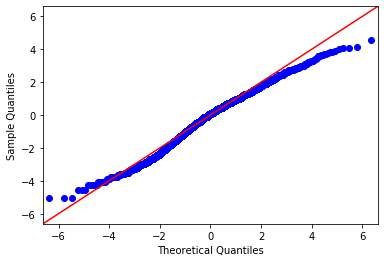

Statistics=569.078, p=0.000
Not a normal distribution
sample no.:  128


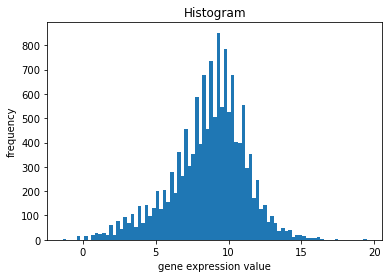

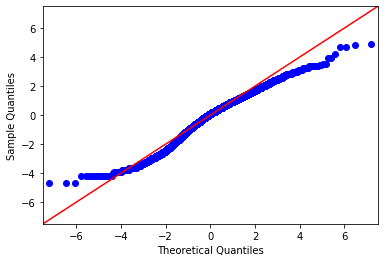

Statistics=758.594, p=0.000
Not a normal distribution
sample no.:  129


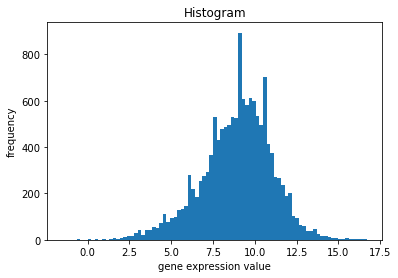

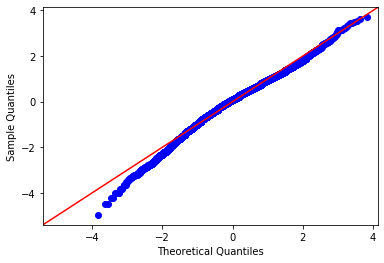

Statistics=524.373, p=0.000
Not a normal distribution
sample no.:  130


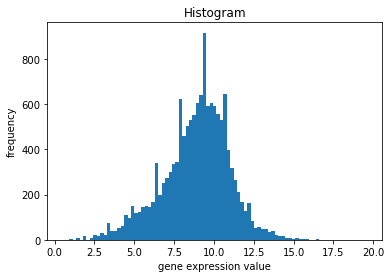

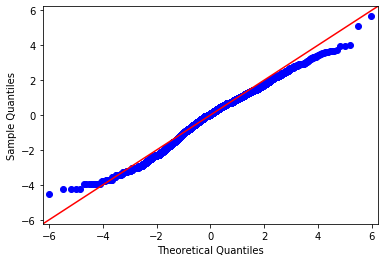

Statistics=459.138, p=0.000
Not a normal distribution
sample no.:  131


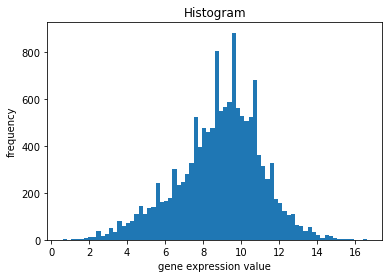

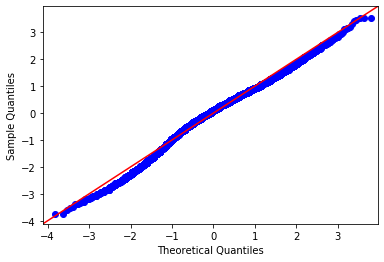

Statistics=397.131, p=0.000
Not a normal distribution
sample no.:  132


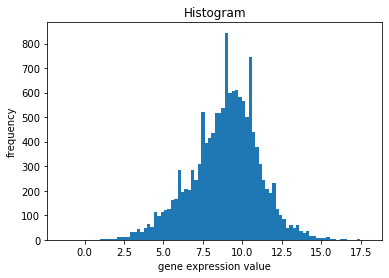

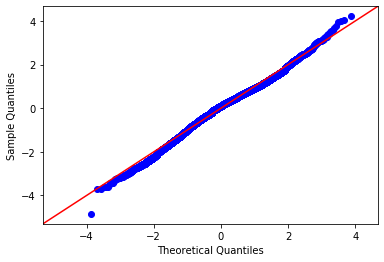

Statistics=239.361, p=0.000
Not a normal distribution
sample no.:  133


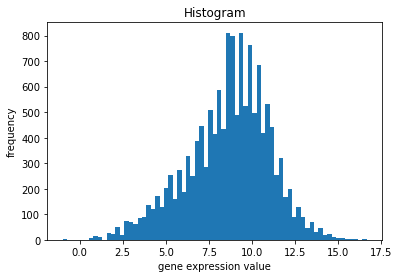

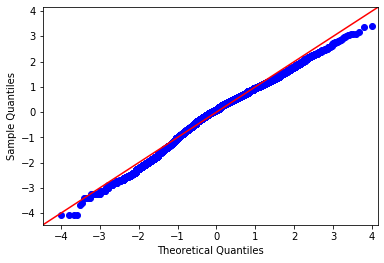

Statistics=418.110, p=0.000
Not a normal distribution
sample no.:  134


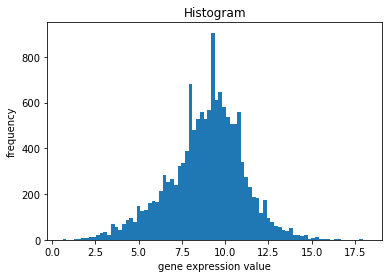

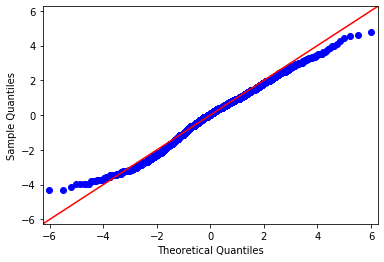

Statistics=332.676, p=0.000
Not a normal distribution
sample no.:  135


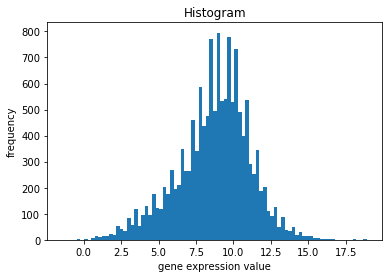

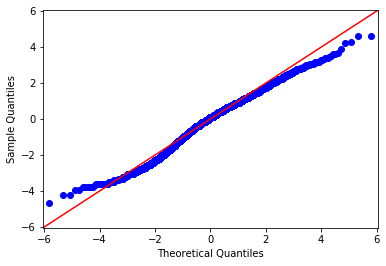

Statistics=440.833, p=0.000
Not a normal distribution
sample no.:  136


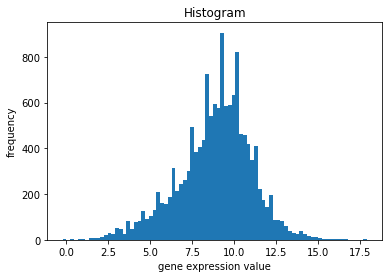

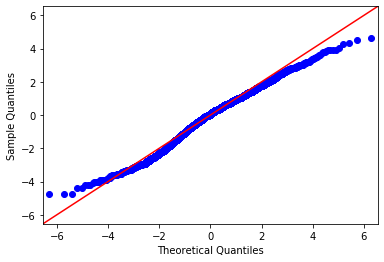

Statistics=483.050, p=0.000
Not a normal distribution
sample no.:  137


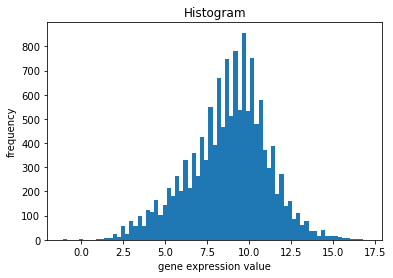

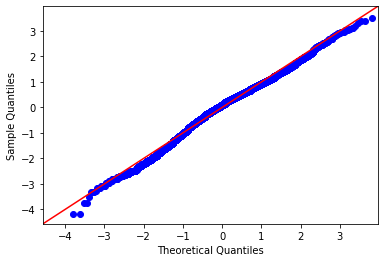

Statistics=267.641, p=0.000
Not a normal distribution
sample no.:  138


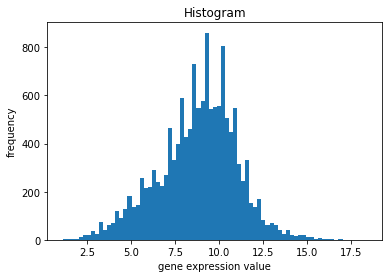

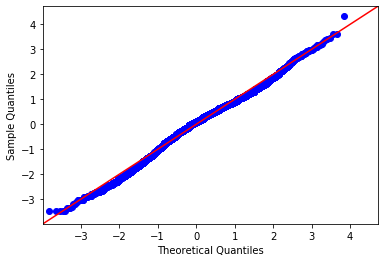

Statistics=215.791, p=0.000
Not a normal distribution
sample no.:  139


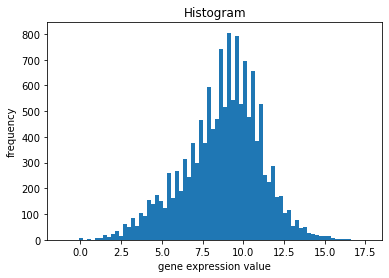

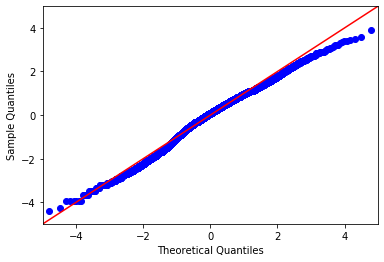

Statistics=368.202, p=0.000
Not a normal distribution
sample no.:  140


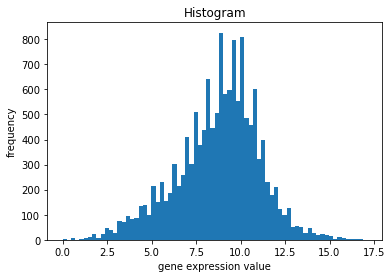

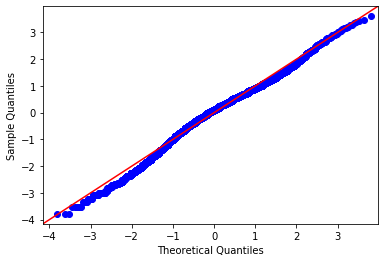

Statistics=391.820, p=0.000
Not a normal distribution
sample no.:  141


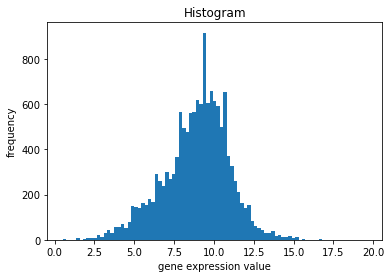

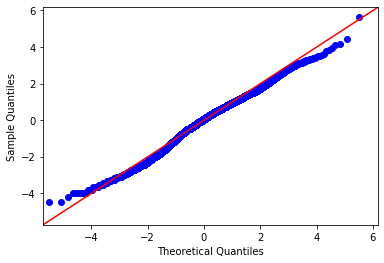

Statistics=346.790, p=0.000
Not a normal distribution
sample no.:  142


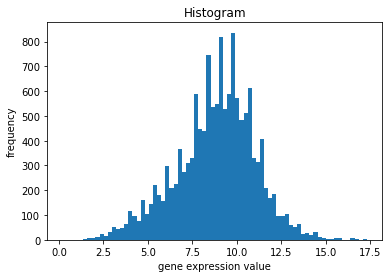

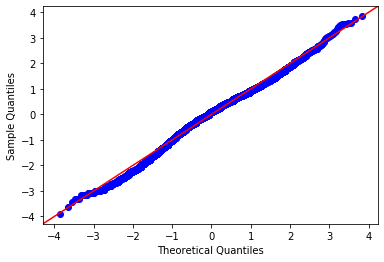

Statistics=252.098, p=0.000
Not a normal distribution
sample no.:  143


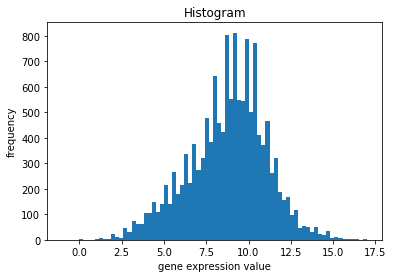

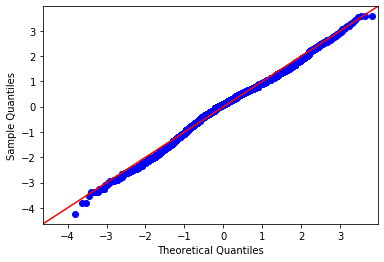

Statistics=233.371, p=0.000
Not a normal distribution
sample no.:  144


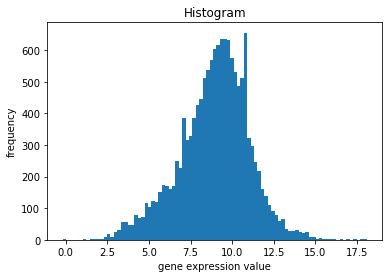

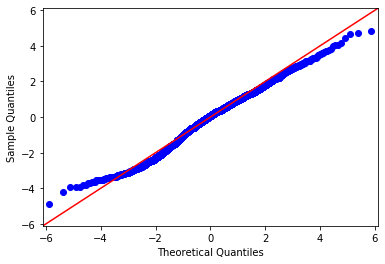

Statistics=331.911, p=0.000
Not a normal distribution
sample no.:  145


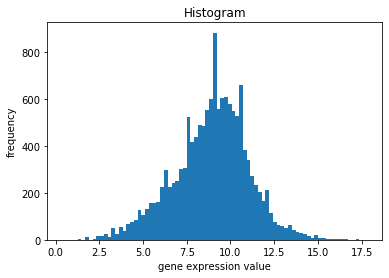

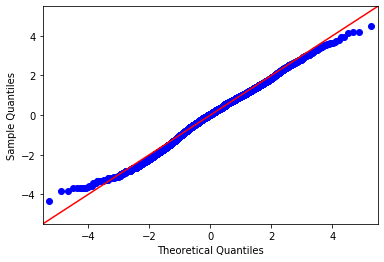

Statistics=192.703, p=0.000
Not a normal distribution
sample no.:  146


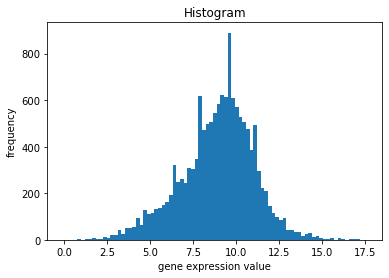

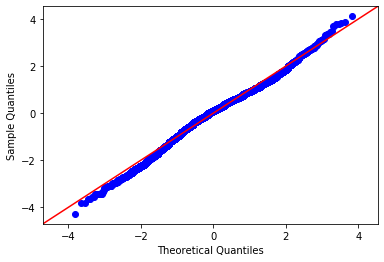

Statistics=310.319, p=0.000
Not a normal distribution
sample no.:  147


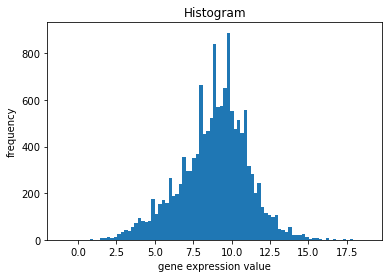

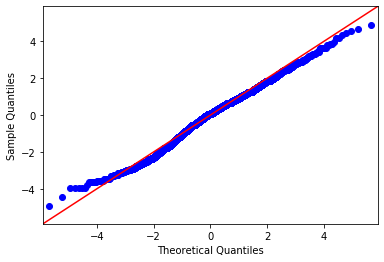

Statistics=301.626, p=0.000
Not a normal distribution
sample no.:  148


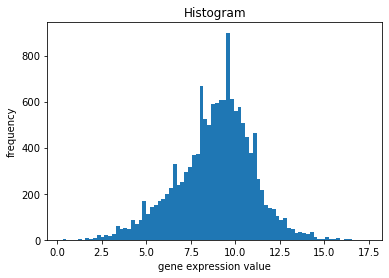

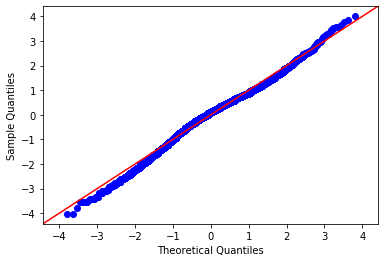

Statistics=340.477, p=0.000
Not a normal distribution
sample no.:  149


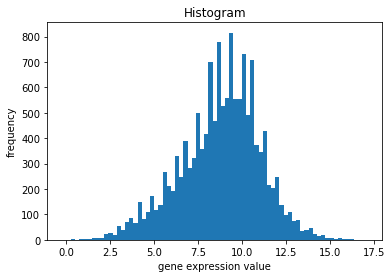

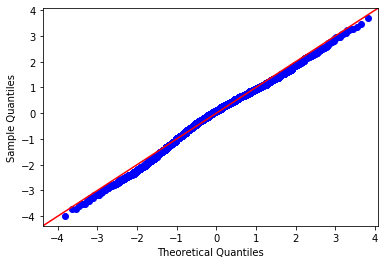

Statistics=287.267, p=0.000
Not a normal distribution
sample no.:  150


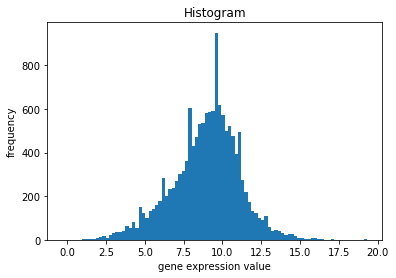

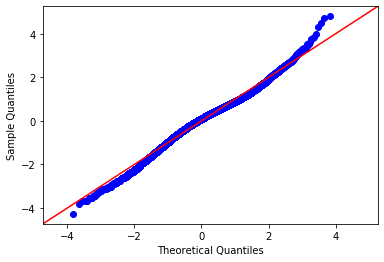

Statistics=294.249, p=0.000
Not a normal distribution
sample no.:  151


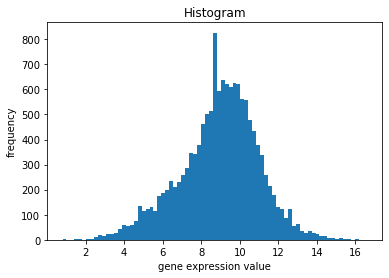

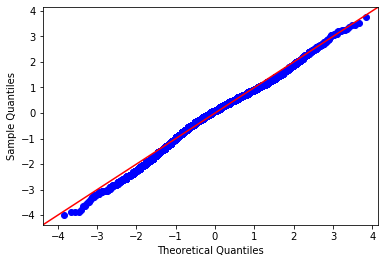

Statistics=324.222, p=0.000
Not a normal distribution
sample no.:  152


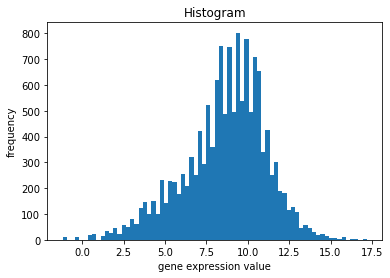

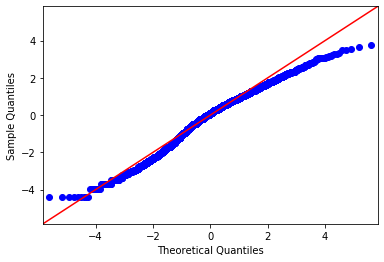

Statistics=698.029, p=0.000
Not a normal distribution
sample no.:  153


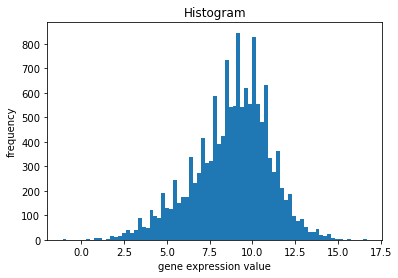

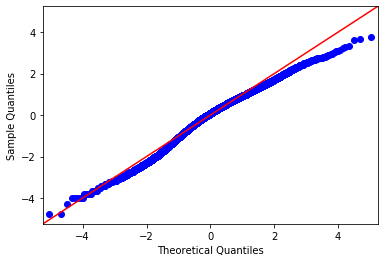

Statistics=556.860, p=0.000
Not a normal distribution
sample no.:  154


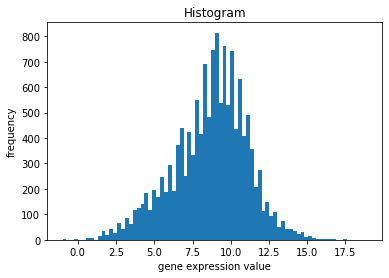

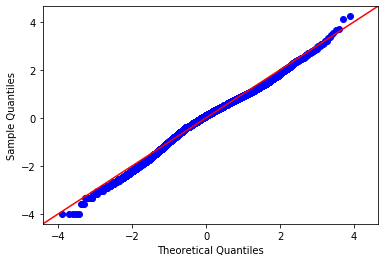

Statistics=330.460, p=0.000
Not a normal distribution
sample no.:  155


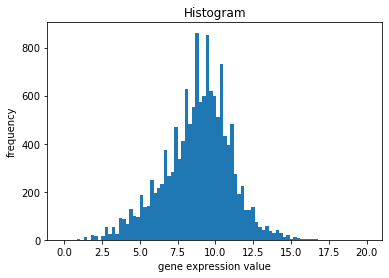

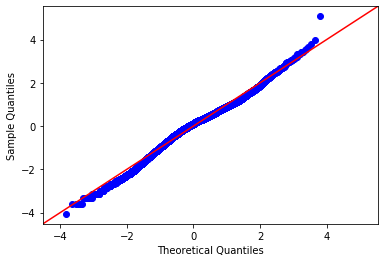

Statistics=316.108, p=0.000
Not a normal distribution
sample no.:  156


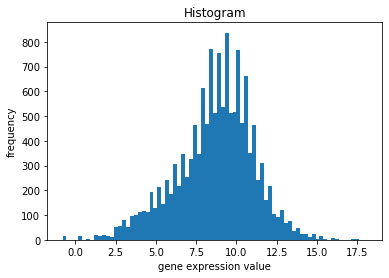

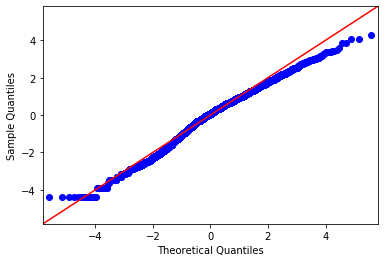

Statistics=522.506, p=0.000
Not a normal distribution
sample no.:  157


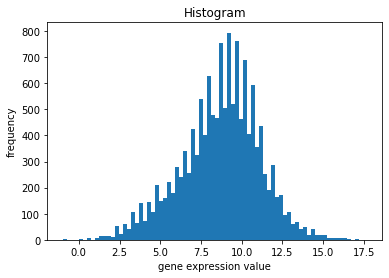

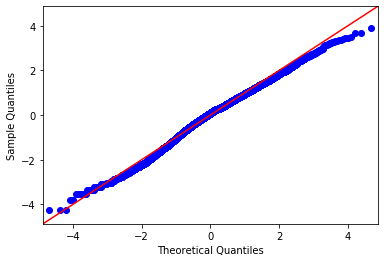

Statistics=243.567, p=0.000
Not a normal distribution
sample no.:  158


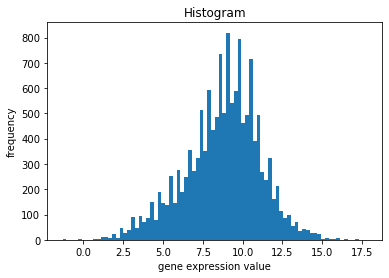

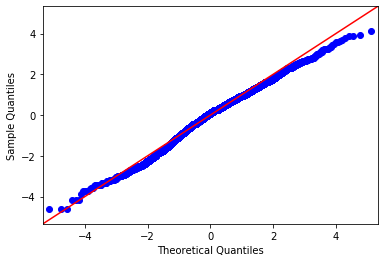

Statistics=335.264, p=0.000
Not a normal distribution
sample no.:  159


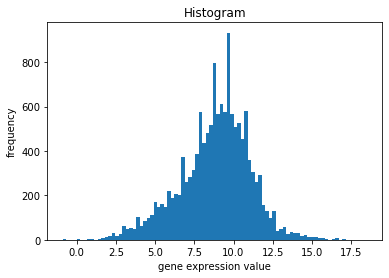

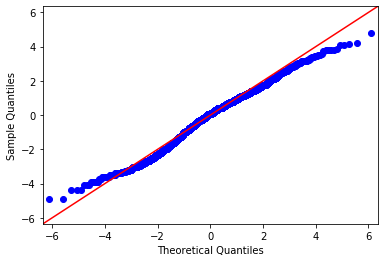

Statistics=433.045, p=0.000
Not a normal distribution
sample no.:  160


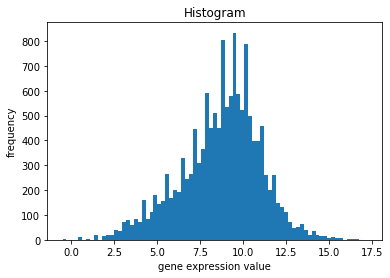

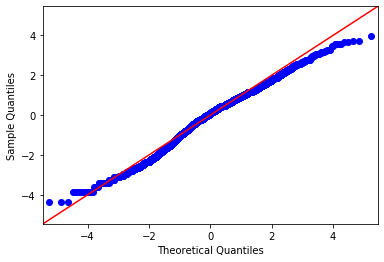

Statistics=424.231, p=0.000
Not a normal distribution
sample no.:  161


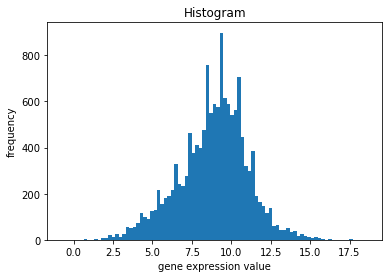

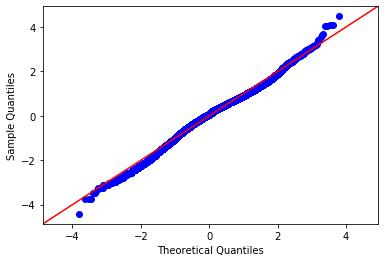

Statistics=248.610, p=0.000
Not a normal distribution
sample no.:  162


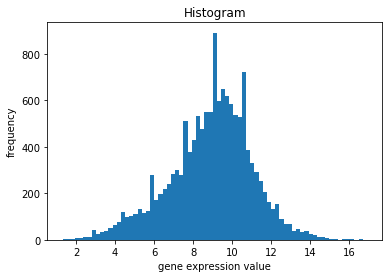

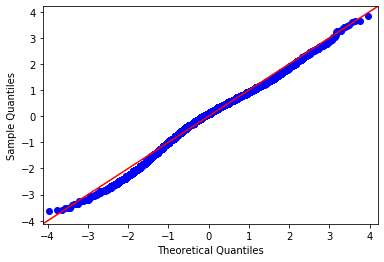

Statistics=351.160, p=0.000
Not a normal distribution
sample no.:  163


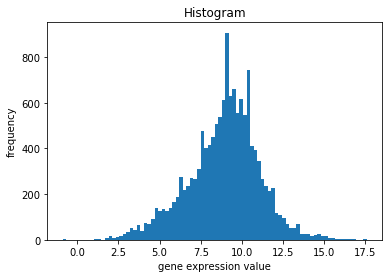

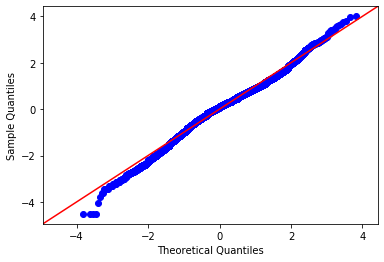

Statistics=357.903, p=0.000
Not a normal distribution
sample no.:  164


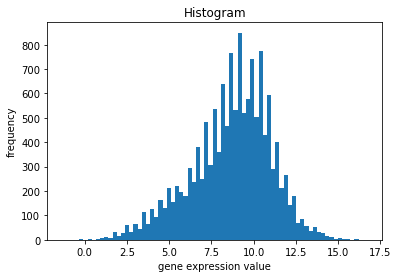

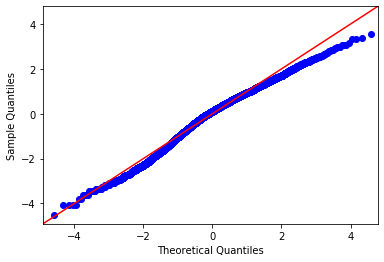

Statistics=519.569, p=0.000
Not a normal distribution
sample no.:  165


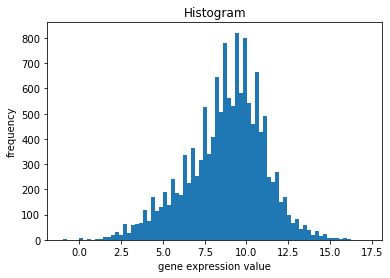

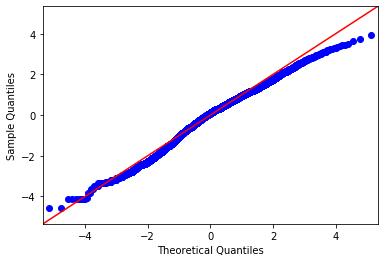

Statistics=432.516, p=0.000
Not a normal distribution
sample no.:  166


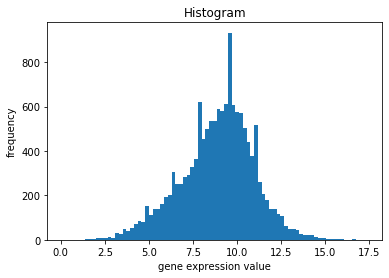

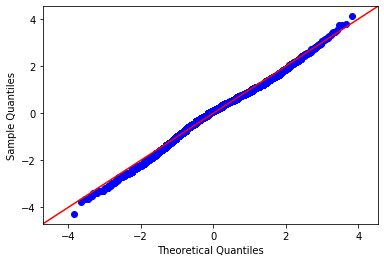

Statistics=246.260, p=0.000
Not a normal distribution
sample no.:  167


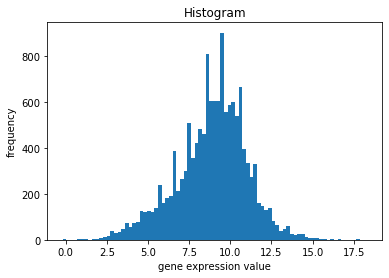

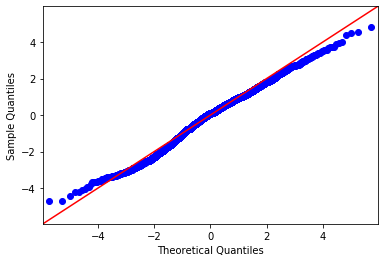

Statistics=352.971, p=0.000
Not a normal distribution
sample no.:  168


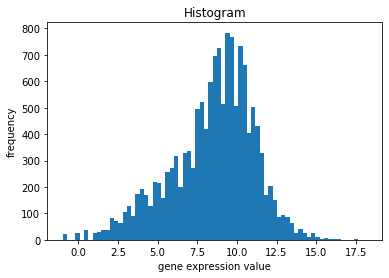

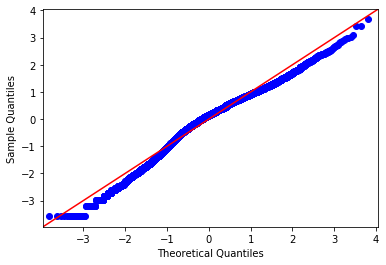

Statistics=746.195, p=0.000
Not a normal distribution
sample no.:  169


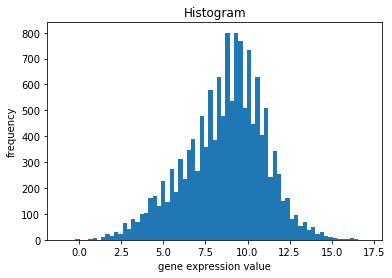

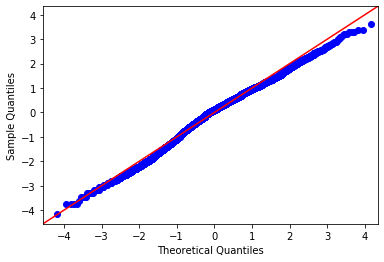

Statistics=301.541, p=0.000
Not a normal distribution
sample no.:  170


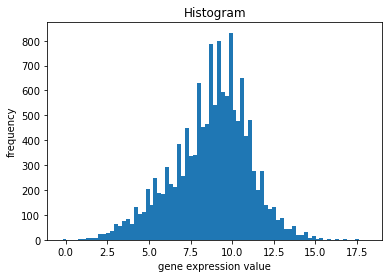

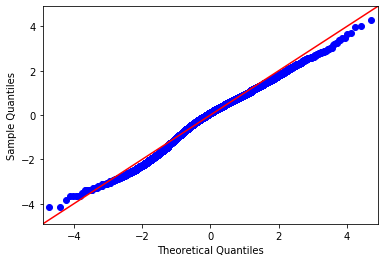

Statistics=369.831, p=0.000
Not a normal distribution
sample no.:  171


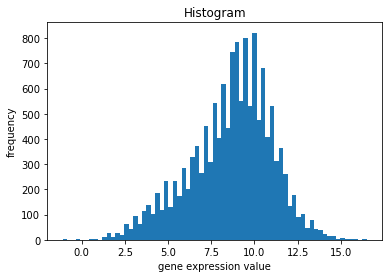

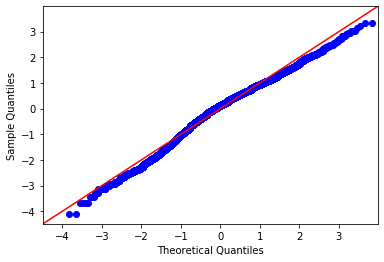

Statistics=473.097, p=0.000
Not a normal distribution
sample no.:  172


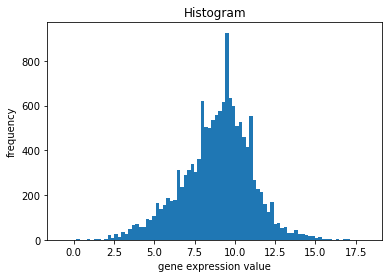

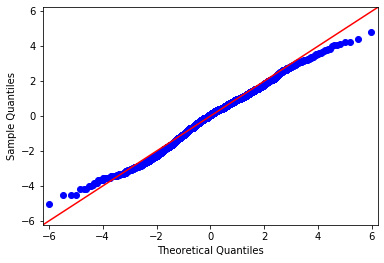

Statistics=305.890, p=0.000
Not a normal distribution
sample no.:  173


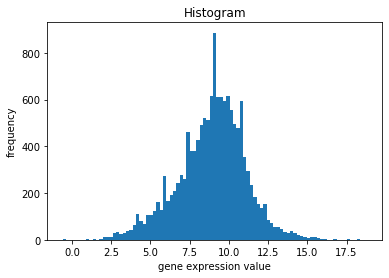

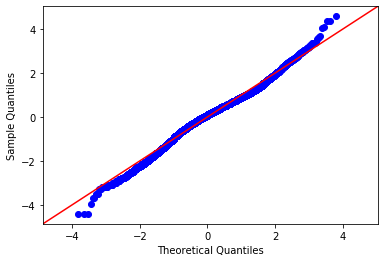

Statistics=315.586, p=0.000
Not a normal distribution
sample no.:  174


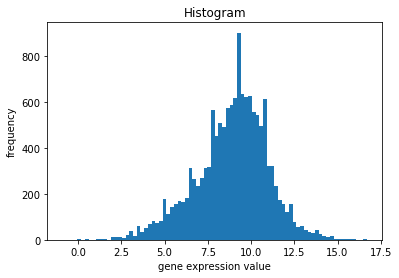

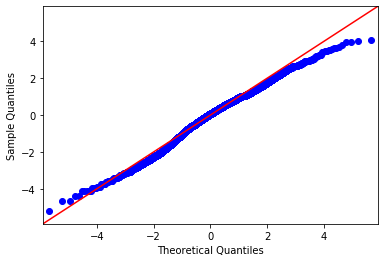

Statistics=459.844, p=0.000
Not a normal distribution
sample no.:  175


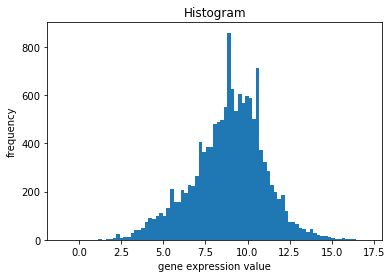

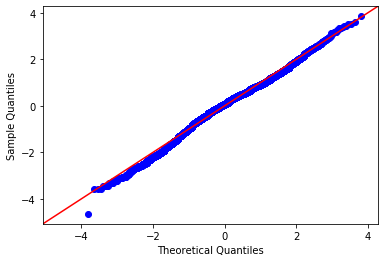

Statistics=258.259, p=0.000
Not a normal distribution
sample no.:  176


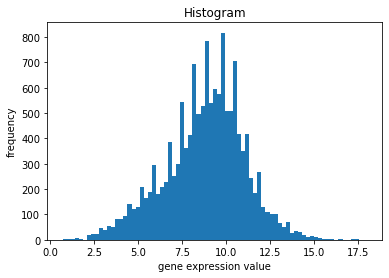

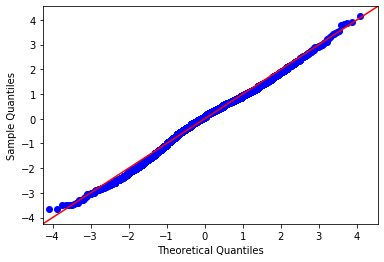

Statistics=214.141, p=0.000
Not a normal distribution
sample no.:  177


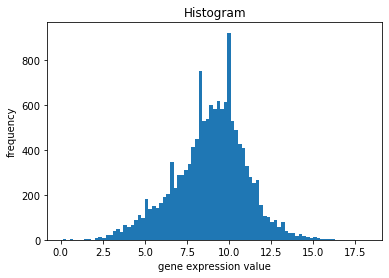

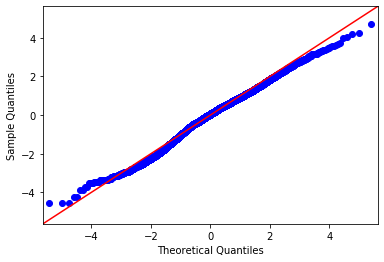

Statistics=286.105, p=0.000
Not a normal distribution
sample no.:  178


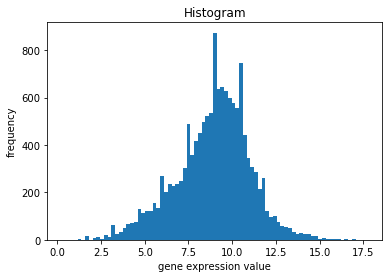

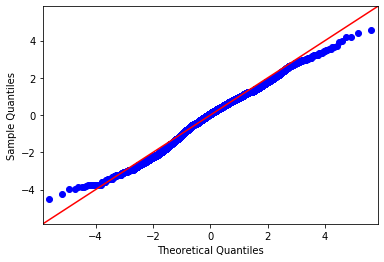

Statistics=326.442, p=0.000
Not a normal distribution
sample no.:  179


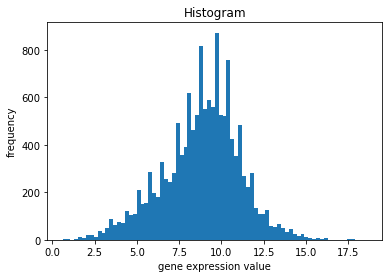

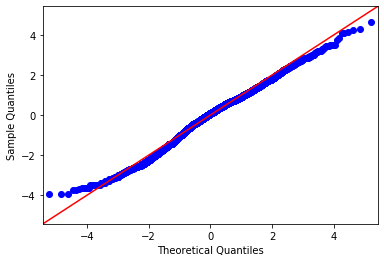

Statistics=247.812, p=0.000
Not a normal distribution
sample no.:  180


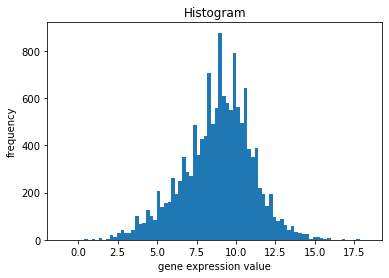

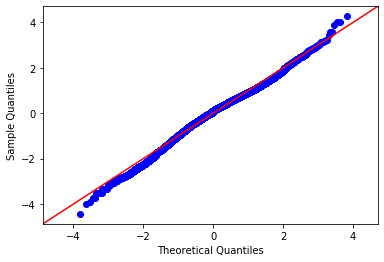

Statistics=295.868, p=0.000
Not a normal distribution
sample no.:  181


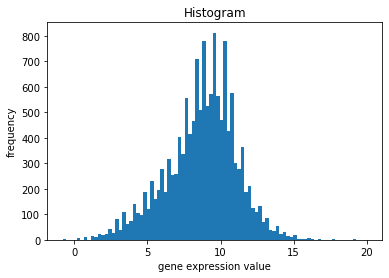

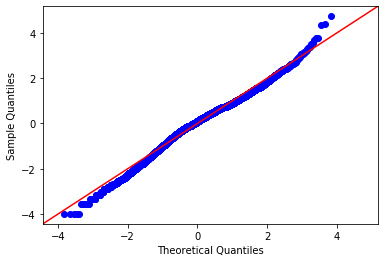

Statistics=417.804, p=0.000
Not a normal distribution
sample no.:  182


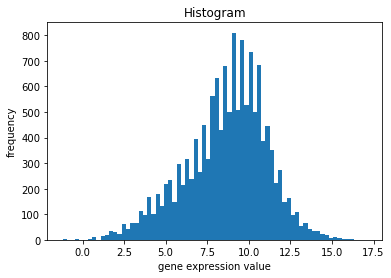

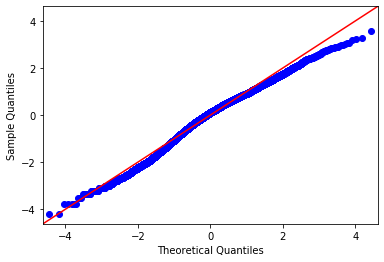

Statistics=427.342, p=0.000
Not a normal distribution
sample no.:  183


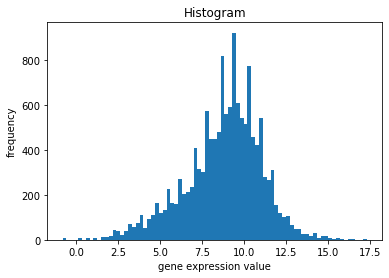

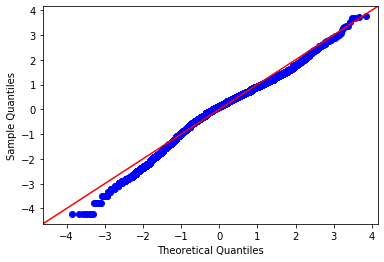

Statistics=719.154, p=0.000
Not a normal distribution


In [29]:

## Plot histogram for all the smaple 
import matplotlib.pyplot as plt 
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import normaltest


for i in range(0,data_m.shape[1]):
    sample = data_m[:, i].T
    print("sample no.: ", i+1)
    
    """
    ## To print the statistic
    
    print("mean: ",  np.mean(sample))
    print("medain: ", np.median(sample))
    print("variance: ", np.var(sample))
    print("standard deviation: ", np.std(sample))
    print("max: ", np.max(sample))
    print("min: ", np.min(sample))
    """
    _ = plt.hist(sample, bins='auto')
    plt.xlabel("gene expression value")
    plt.ylabel("frequency")
    plt.title("Histogram")
    
    
    fig = sm.qqplot(sample, stats.t, fit=True, line='45')
    plt.show()
    # normality test
    stat, p = normaltest(sample)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Normal  distribution')
    else:
        print('Not a normal distribution')
    
    
   


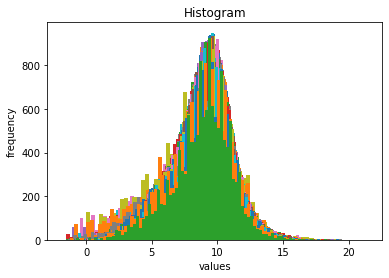

In [30]:
## This will stack all histogram on each other 

import matplotlib.pyplot as plt 

for i in range(0, data_m.shape[1]):
    sample = data_m[:, i].T
    _ = plt.hist(sample, bins='auto')
    plt.xlabel("values")
    plt.ylabel("frequency")
    plt.title("Histogram")

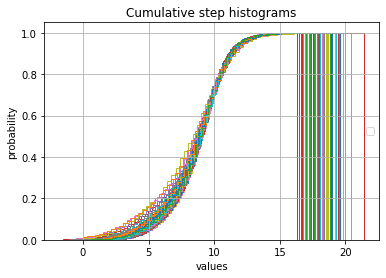

In [31]:

## This will plot emperical cdf of all samples at once 
import logging
logging.getLogger().setLevel(logging.CRITICAL)  ## disable legend warning

for i in range(0, data.shape[1]):
    sample = data_m[:, i].T
    mu = np.mean(sample)
    sigma = np.std(sample)
    n_bins = 'auto'
    
    # plot the cumulative histogram
    n, bins, patches = plt.hist(sample, n_bins, density=True, histtype='step', cumulative=True)
    plt.grid(True)
    plt.legend(loc='right')
    plt.title('Cumulative step histograms')
    plt.xlabel('values')
    plt.ylabel('probability')


In [32]:
## to check variation among the mean of smaples

import numpy as np
a = data_m 
print(a.shape)
print(a)
a = a.sum(axis=0)/a.shape[0]
print(a.shape)
print("mean of mean of gene expression value:", np.mean(a))
print("std. of mean of gene expression value:", np.std(a))

(14098, 183)
[[ 7.45  8.1   7.2  ...  7.35  7.2   9.05]
 [ 6.4   5.8   6.4  ...  7.9   6.    6.9 ]
 [ 7.5   6.8   7.3  ...  6.5   6.9   6.7 ]
 ...
 [12.9  12.4  13.5  ... 13.2  12.3  12.3 ]
 [10.1   9.8   9.8  ...  9.8   9.6  10.9 ]
 [ 9.3   8.9   9.2  ...  8.6   8.4   9.4 ]]
(183,)
mean of mean of gene expression value: 8.773019
std. of mean of gene expression value: 0.13272879



We see that the mean gene expression value of all samples is relatively the same with very low standard deviation. [mean of mean of gene expression value: 8.773019 $\pm $ 0.13272879]. 

By varying the bin size we see different histogram i.e. the visualisation of hisogram changes due to the bin size due to finite resolution of the samples. However, if we look at data with a very large number of bins such error are minimized and we see a clear normal with certaim properties emerging. The Q-Q Plot(for Normality test) also shows a very good correlation. By looking at the data, it looks like that distibution is Normal and left skewed (or negaively skewed). This can also be seen at the ends of the QQ plot where the correlation is not that clear.  

A possible reason for loss of Normality in the Lower gene expression values could directly be the Resolution. As for the Lower values the Impact of Quantisation error is more prominent.
 

By looking at the above empirical CDF, we can say that variation among the low expressed gene is slightly higher as compare to highly expressed gene.


# 3. Understand the effect of Interferons in Pancreatic Adenocarcinoma

Interferons (IFNs) are a group of signaling proteins made and released by host cells in response to the presence of several pathogens, such as viruses, bacteria, parasites, and also tumor cells. Type I interferons (IFNs) are a large subgroup of interferon proteins that help regulate the activity of the immune system. The genes responsible for type 1 Interferons is called Type 1 IFN signature and consists of a set of 25 genes in homo sapiens.

### Part 3 Q 1


To remove the Neuroendocrine tumors sample, we will use the Phantasus tool. 
Since all Neuroendocrine tumors samples are separated in the PCA plot. Out of 183 samples, 175 samples are Pancreatic Adenocarcinoma. We have included 1 sample which has (moderately differentiated ductal adenocarcinoma 60% + neuroendocrine 40% in the analysis. 

In [33]:
from cmapPy.pandasGEXpress.parse import parse

# read all data at once 
adeno_data = parse("PAAD_AD.gct") ## cleaned and Pancreatic Adenocarcinoma file
adeno_data.data_df.shape #yup! print the shape 
adeno_data.data_df.head()

cid      aab1-Primary solid Tumor  aab4-Primary solid Tumor  \
rid                                                           
SLC35E2                      7.45                       8.1   
A1BG                         6.40                       5.8   
A2LD1                        7.50                       6.8   
A2M                         14.30                      14.0   
A4GALT                      10.60                      10.2   

cid      aab6-Primary solid Tumor  aab8-Primary solid Tumor  \
rid                                                           
SLC35E2                       7.2                       8.0   
A1BG                          6.4                       5.8   
A2LD1                         7.3                       7.5   
A2M                          13.1                      13.8   
A4GALT                       10.1                       8.6   

cid      aab9-Primary solid Tumor  aaba-Primary solid Tumor  \
rid                                                           
SLC35E2                      7.65                       8.1   
A1BG                         6.70                       6.6   
A2LD1                        7.40                       6.6   
A2M                         14.60                      13.3   
A4GALT                      10.10                       9.3   

cid      aabe-Primary solid Tumor  aabf-Primary solid Tumor  \
rid                                                           
SLC35E2                       8.2                       8.2   
A1BG                          6.3                       6.5   
A2LD1                         7.1                       6.8   
A2M                          13.4                      14.2   
A4GALT                        9.5                       8.4   

cid      aabh-Primary solid Tumor  aabi-Primary solid Tumor  ...  \
rid                                                          ...   
SLC35E2                      7.55                      8.45  ...   
A1BG                         5.70                      6.30  ...   
A2LD1                        8.00                      5.80  ...   
A2M                         13.90                     11.90  ...   
A4GALT                       8.40                      7.90  ...   

cid      aauh-Primary solid Tumor  aaui-Primary solid Tumor  \
rid                                                           
SLC35E2                      8.45                      7.95   
A1BG                         7.10                      7.10   
A2LD1                        6.50                      7.30   
A2M                         14.50                     14.30   
A4GALT                       9.10                      9.50   

cid      aaul-Primary solid Tumor  a8t3-Primary solid Tumor  \
rid                                                           
SLC35E2                       8.3                      8.05   
A1BG                          6.7                      7.00   
A2LD1                         6.1                      6.70   
A2M                          14.5                     14.20   
A4GALT                       10.0                      9.50   

cid      a8t5-Primary solid Tumor  a89d-Solid Tissue Normal  \
rid                                                           
SLC35E2                       8.2                      7.25   
A1BG                          6.9                      7.10   
A2LD1                         6.5                      6.70   
A2M                          14.3                     14.90   
A4GALT                        9.1                     10.50   

cid      a89d-Primary solid Tumor  a8sy-Primary solid Tumor  \
rid                                                           
SLC35E2                       7.4                      7.35   
A1BG                          7.3                      7.90   
A2LD1                         6.7                      6.50   
A2M                          14.5                     13.00   
A4GALT                        9.8                  

In [34]:
## Sepearte Type 1 IFN gene 
with open("type1_IFN.txt") as file:
    IFNs = file.read().splitlines()
    
print(IFNs)  
# Find all IFN gene
ifn_data = adeno_data.data_df.loc[IFNs]

ifn_data   ## Print IFNs data 

['IFIT1', 'IFI44', 'IFIT3', 'MX2', 'OAS1', 'OAS3', 'BST2', 'IFITM1', 'MX1', 'STAT1', 'IFI27', 'CXCL10', 'IFI16', 'IFI30', 'IFIH1', 'IFIT2', 'IFITM2', 'IRF1', 'IRF9', 'ISG15', 'OAS2', 'PSME1', 'SOCS1', 'STAT2']


cid     aab1-Primary solid Tumor  aab4-Primary solid Tumor  \
rid                                                          
IFIT1                        9.5                      10.5   
IFI44                        9.4                      11.1   
IFIT3                       10.0                      10.8   
MX2                          9.8                      10.7   
OAS1                        11.7                      11.0   
OAS3                        11.3                      11.9   
BST2                        12.2                      12.7   
IFITM1                      11.2                      12.9   
MX1                         11.5                      12.4   
STAT1                       12.2                      12.7   
IFI27                       13.5                      13.8   
CXCL10                       9.4                       8.7   
IFI16                       11.0                      11.3   
IFI30                       11.7                      12.3   
IFIH1                        9.5                      10.2   
IFIT2                        8.6                       8.9   
IFITM2                      11.2                      12.3   
IRF1                        10.8                      11.2   
IRF9                        11.4                      11.4   
ISG15                       11.7                      11.7   
OAS2                        11.5                      11.0   
PSME1                       12.3                      12.3   
SOCS1                        7.7                       7.4   
STAT2                       11.2                      11.3   

cid     aab6-Primary solid Tumor  aab8-Primary solid Tumor  \
rid                                                          
IFIT1                       12.2                      10.7   
IFI44                       11.2                      10.6   
IFIT3                       11.6                      10.3   
MX2                         11.0                      10.8   
OAS1                        11.3                      10.5   
OAS3                        12.0                      11.0   
BST2                        12.7                      11.9   
IFITM1                      12.5                      12.0   
MX1                         12.6                      12.9   
STAT1                       12.9                      12.5   
IFI27                       14.4                      13.2   
CXCL10                       8.8                       7.2   
IFI16                       12.3                      12.3   
IFI30                       12.1                      12.0   
IFIH1                       10.3                      10.1   
IFIT2                       10.5                       9.4   
IFITM2                      11.3                      12.3   
IRF1                         9.8                      10.4   
IRF9                        11.4                      10.8   
ISG15                       13.9                      11.8   
OAS2                        11.8                      11.4   
PSME1                       12.0                      11.7   
SOCS1                        7.9                       6.8   
STAT2                       12.0                      11.7   

cid     aab9-Primary solid Tumor  aaba-Primary solid Tumor  \
rid                                                          
IFIT1                        8.6                       6.7   
IFI44                        8.8                       8.4   
IFIT3                        9.0                       7.8   
MX2                          8.3                       9.2   
OAS1                         9.2                      10.6   
OAS3                         9.7                       9.6   
BST2                        10.4                      10.9   
IFITM1                      10.6                      10.8   
MX1                         10.3                      10.1   
STAT1                       11.6                      11.2   
IFI27                       12

In [35]:
## Transpose the data to plot histogram
ifn_data = ifn_data.transpose()
ifn_data

rid                       IFIT1  IFI44  IFIT3   MX2  OAS1  OAS3  BST2  IFITM1  \
cid                                                                             
aab1-Primary solid Tumor    9.5    9.4   10.0   9.8  11.7  11.3  12.2    11.2   
aab4-Primary solid Tumor   10.5   11.1   10.8  10.7  11.0  11.9  12.7    12.9   
aab6-Primary solid Tumor   12.2   11.2   11.6  11.0  11.3  12.0  12.7    12.5   
aab8-Primary solid Tumor   10.7   10.6   10.3  10.8  10.5  11.0  11.9    12.0   
aab9-Primary solid Tumor    8.6    8.8    9.0   8.3   9.2   9.7  10.4    10.6   
...                         ...    ...    ...   ...   ...   ...   ...     ...   
a89d-Solid Tissue Normal    8.4    8.9    9.1   9.3  10.5  10.1  12.2    11.9   
a89d-Primary solid Tumor    9.5    9.3    9.6  10.0  10.9  10.4  12.5    11.9   
a8sy-Primary solid Tumor   10.4   10.6   10.5  11.4  11.1  11.1  12.9    12.2   
a8lh-Primary solid Tumor   11.1   10.8   10.7  11.5  11.9  12.4  13.4    12.9   
aapl-Primary solid Tumor   10.2   10.9   10.2  10.9  10.7  11.5  11.6    12.5   

rid                        MX1  STAT1  ...  IFIH1  IFIT2  IFITM2  IRF1  IRF9  \
cid                                    ...                                     
aab1-Primary solid Tumor  11.5   12.2  ...    9.5    8.6    11.2  10.8  11.4   
aab4-Primary solid Tumor  12.4   12.7  ...   10.2    8.9    12.3  11.2  11.4   
aab6-Primary solid Tumor  12.6   12.9  ...   10.3   10.5    11.3   9.8  11.4   
aab8-Primary solid Tumor  12.9   12.5  ...   10.1    9.4    12.3  10.4  10.8   
aab9-Primary solid Tumor  10.3   11.6  ...    9.5    8.3    11.9  10.2  10.6   
...                        ...    ...  ...    ...    ...     ...   ...   ...   
a89d-Solid Tissue Normal  11.0   11.5  ...    9.0    8.2    12.5  10.4  10.4   
a89d-Primary solid Tumor  11.2   11.8  ...    9.6    8.9    12.2  10.4  10.3   
a8sy-Primary solid Tumor  12.6   12.2  ...    9.5    8.9    11.7  10.7  10.5   
a8lh-Primary solid Tumor  13.6   12.4  ...   10.3    8.7    12.5  10.4  11.4   
aapl-Primary solid Tumor  12.9   13.0  ...   10.0    9.1    12.4  11.2  11.0   

rid                       ISG15  OAS2  PSME1  SOCS1  STAT2  
cid                                                         
aab1-Primary solid Tumor   11.7  11.5   12.3    7.7   11.2  
aab4-Primary solid Tumor   11.7  11.0   12.3    7.4   11.3  
aab6-Primary solid Tumor   13.9  11.8   12.0    7.9   12.0  
aab8-Primary solid Tumor   11.8  11.4   11.7    6.8   11.7  
aab9-Primary solid Tumor    9.7   9.1   11.7    7.4   11.1  
...                         ...   ...    ...    ...    ...  
a89d-Solid Tissue Normal   10.9  10.1   11.9    7.2   11.3  
a89d-Primary solid Tumor   11.3  10.5   12.0    7.2   11.1  
a8sy-Primary solid Tumor   12.7  11.3   11.5    7.3   11.8  
a8lh-Primary solid Tumor   12.1  12.1   12.6    6.0   10.8  
aapl-Primary solid Tumor   11.5  12.0   12.2    8.8   11.7  

[175 rows x 24 columns]

In [36]:
ifn_data.shape # check dimensions agian

(175, 24)

In [37]:
ifn_data.columns[0]
# ifn_data['IFIT1']

'IFIT1'

IFIT1


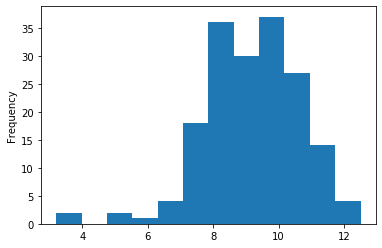

IFI44


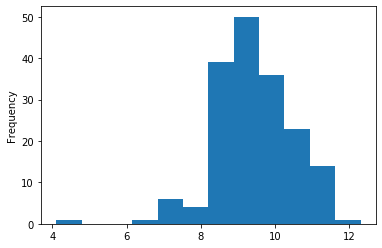

IFIT3


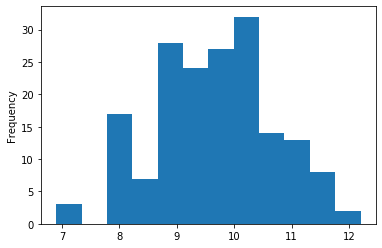

MX2


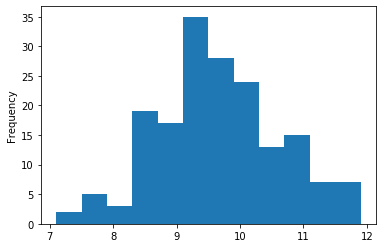

OAS1


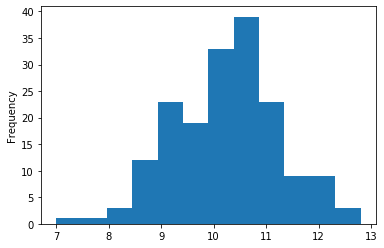

OAS3


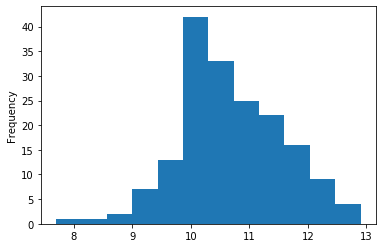

BST2


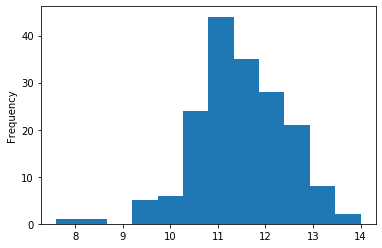

IFITM1


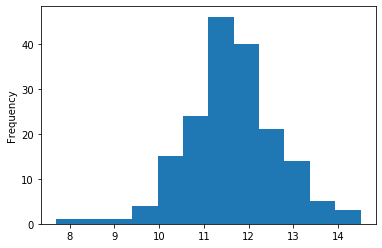

MX1


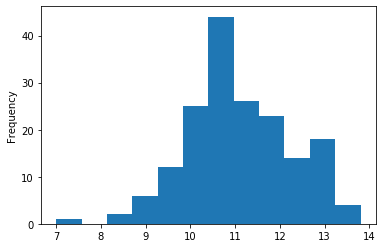

STAT1


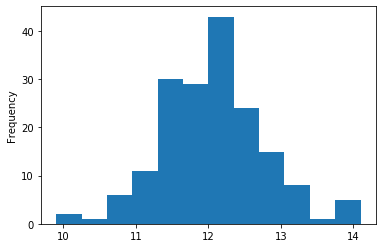

IFI27


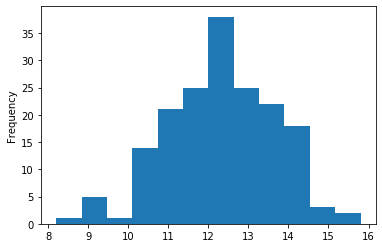

CXCL10


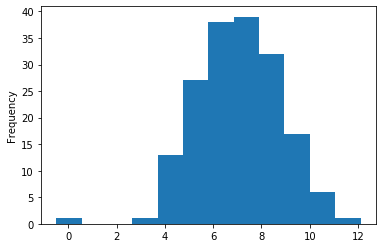

IFI16


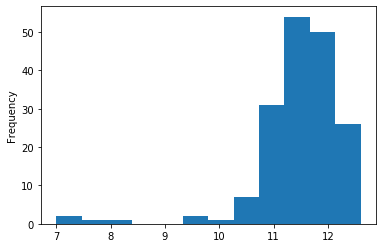

IFI30


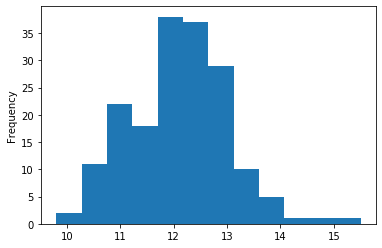

IFIH1


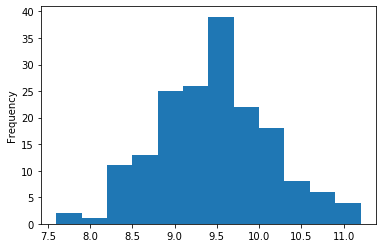

IFIT2


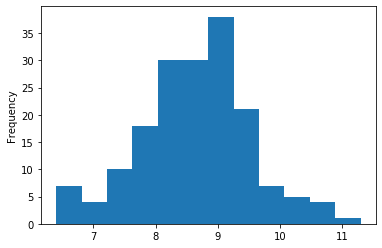

IFITM2


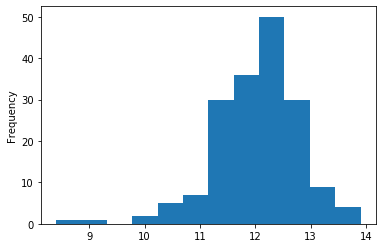

IRF1


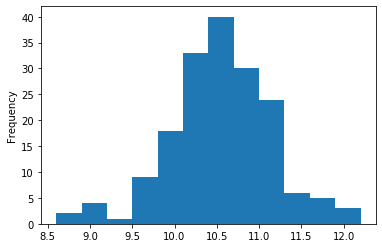

IRF9


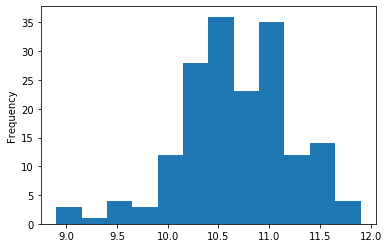

ISG15


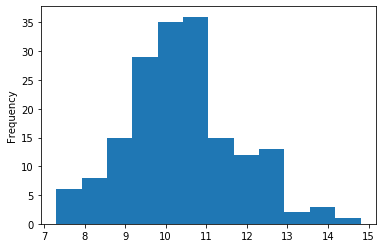

OAS2


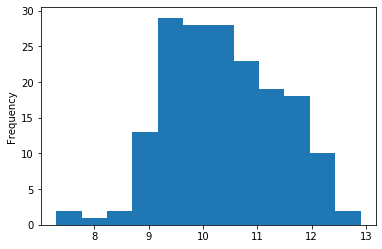

PSME1


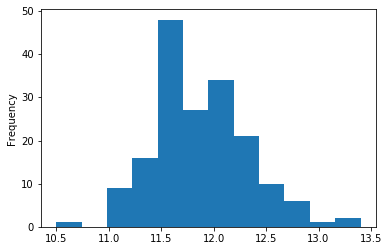

SOCS1


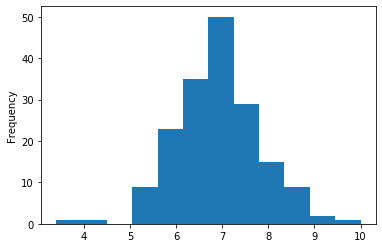

STAT2


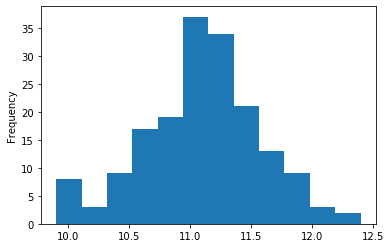

In [38]:
## plot all histogram at once 
## Individual histogram for each gene can be plotted.
import matplotlib.pyplot as plt
for i in range(0, ifn_data.shape[1]):
    print(str(ifn_data.columns[i]))
    ifn_data[ifn_data.columns[i]].plot(kind='hist', bins = 12) 
    plt.show()


In [39]:
ifn_data_m = ifn_data.to_numpy()
# ifn_data_m[1:]

ifn_data_m.shape

(175, 24)

In [40]:
print("mean gene expression value of all IFNs: ", ifn_data_m.mean())

mean gene expression value of all IFNs:  10.402072


In [41]:
sample = ifn_data_m[0:, 1]
print(sample.shape)

(175,)


In [42]:

## print statistic for gene 
for i in range(0, ifn_data_m.shape[1]):
    sample = ifn_data_m[0:,i]
    print(i+1)
    print("mean: ",  np.mean(sample))
    print("medain: ", np.median(sample))
    print("variance: ", np.var(sample))
    print("standard deviation: ", np.std(sample))
    print("max: ", np.max(sample))
    print("min: ", np.min(sample))
    print('\n')
    

1
mean:  9.142286
medain:  9.2
variance:  2.1587832
standard deviation:  1.4692798
max:  12.5
min:  3.2


2
mean:  9.387429
medain:  9.3
variance:  1.1273849
standard deviation:  1.0617838
max:  12.3
min:  4.1


3
mean:  9.662857
medain:  9.7
variance:  1.0457633
standard deviation:  1.0226257
max:  12.2
min:  6.9


4
mean:  9.613715
medain:  9.6
variance:  0.93924046
standard deviation:  0.96914417
max:  11.9
min:  7.1


5
mean:  10.254286
medain:  10.3
variance:  1.008996
standard deviation:  1.004488
max:  12.8
min:  7.0


6
mean:  10.668571
medain:  10.6
variance:  0.80615515
standard deviation:  0.8978614
max:  12.9
min:  7.7


7
mean:  11.461143
medain:  11.4
variance:  0.954033
standard deviation:  0.97674614
max:  14.0
min:  7.6


8
mean:  11.598858
medain:  11.6
variance:  1.0639987
standard deviation:  1.0315031
max:  14.5
min:  7.7


9
mean:  11.080571
medain:  10.9
variance:  1.3729941
standard deviation:  1.1717483
max:  13.8
min:  7.0


10
mean:  12.051999
medain:  12.0
v

 
**Hypothesis** <br />
The Expression of IFNs genes is higher as compared to the normal genes. (Hard to convince!!!) But I will try. 

Let assume that we have the only sample with all the gene expressed data. After analysis, we find out the mean gene expression of the sample. Now, Let's pick only one IFNs gene (for example IFIT3), and compare its values to mean gene expression value. Let's say that you find it's valued less than the average.

(You may say that your hypothesis is wrong.) <br />
<br />
but wait :) We have only looked at only one sample. So, our sample size is small. 


Now, we will compare the gene expression value for IFT3  across all samples [Notice that the mean value of IFNs is higher with less standard deviation]. Now, if its mean expression is higher as compared to the sample mean. Then we can conclude that it's the higher expression that the rest of the gene combined.

The same analogy can be applied for all the IFNs.
(This is not true for 3 IFNs genes out of 24)

Here, we may conclude that the IFNs gene has higher expression than the mean expression of the all gene. If the patient (or person) is infected from pathogens i.e. viruses, bacteria, and parasites or have cancer.

Mean gene expression value of all IFNs combined across all samples:  10.402072 <br/> 
Mean gene expression value of all genes across all samples:  8.773021

Also, the variation in expression of IFNs gene across all samples is very low.

## We will run GSVA in R 
 

In [43]:
expression_set = adeno_data.data_df
print(expression_set.shape)
expression_set.head()
# expression_set.to_csv('expression_set.csv', header = False, index= False)

(14098, 175)


cid      aab1-Primary solid Tumor  aab4-Primary solid Tumor  \
rid                                                           
SLC35E2                      7.45                       8.1   
A1BG                         6.40                       5.8   
A2LD1                        7.50                       6.8   
A2M                         14.30                      14.0   
A4GALT                      10.60                      10.2   

cid      aab6-Primary solid Tumor  aab8-Primary solid Tumor  \
rid                                                           
SLC35E2                       7.2                       8.0   
A1BG                          6.4                       5.8   
A2LD1                         7.3                       7.5   
A2M                          13.1                      13.8   
A4GALT                       10.1                       8.6   

cid      aab9-Primary solid Tumor  aaba-Primary solid Tumor  \
rid                                                           
SLC35E2                      7.65                       8.1   
A1BG                         6.70                       6.6   
A2LD1                        7.40                       6.6   
A2M                         14.60                      13.3   
A4GALT                      10.10                       9.3   

cid      aabe-Primary solid Tumor  aabf-Primary solid Tumor  \
rid                                                           
SLC35E2                       8.2                       8.2   
A1BG                          6.3                       6.5   
A2LD1                         7.1                       6.8   
A2M                          13.4                      14.2   
A4GALT                        9.5                       8.4   

cid      aabh-Primary solid Tumor  aabi-Primary solid Tumor  ...  \
rid                                                          ...   
SLC35E2                      7.55                      8.45  ...   
A1BG                         5.70                      6.30  ...   
A2LD1                        8.00                      5.80  ...   
A2M                         13.90                     11.90  ...   
A4GALT                       8.40                      7.90  ...   

cid      aauh-Primary solid Tumor  aaui-Primary solid Tumor  \
rid                                                           
SLC35E2                      8.45                      7.95   
A1BG                         7.10                      7.10   
A2LD1                        6.50                      7.30   
A2M                         14.50                     14.30   
A4GALT                       9.10                      9.50   

cid      aaul-Primary solid Tumor  a8t3-Primary solid Tumor  \
rid                                                           
SLC35E2                       8.3                      8.05   
A1BG                          6.7                      7.00   
A2LD1                         6.1                      6.70   
A2M                          14.5                     14.20   
A4GALT                       10.0                      9.50   

cid      a8t5-Primary solid Tumor  a89d-Solid Tissue Normal  \
rid                                                           
SLC35E2                       8.2                      7.25   
A1BG                          6.9                      7.10   
A2LD1                         6.5                      6.70   
A2M                          14.3                     14.90   
A4GALT                        9.1                     10.50   

cid      a89d-Primary solid Tumor  a8sy-Primary solid Tumor  \
rid                                                           
SLC35E2                       7.4                      7.35   
A1BG                          7.3                      7.90   
A2LD1                         6.7                      6.50   
A2M                          14.5                     13.00   
A4GALT                        9.8                  

In [44]:
import pandas as pd
from pandas import DataFrame 
from GSVA import gsva,  gmt_to_dataframe

## Sepearte Type 1 IFN gene 
with open("type1_IFN.txt") as file:
    gene_set = file.read().splitlines()

# gene_set = DataFrame(gene_set, columns=['member'])

# gene_set['name'] =  gene_set 

# gene_set.head
# a = gmt_to_dataframe('geneset.gmt')
# a.head()

# df = pd.read_table('geneset.gmt')
# df.head()

# gene.head()

# gsva(expression_set, a)

# 2. Identify only the Exocrine (adenocarcinoma) tumors and remove Neuroendocrine tumors.

We want to stratify these tumor samples by the type of pancreatic cancer they exhibit. For this, apply
dimensionality reduction techniques (PCA) to find these two groups within this multi-dimensional
data.

### Q2 ALL parts

#### 1. Visualize the data whole data using PCA.

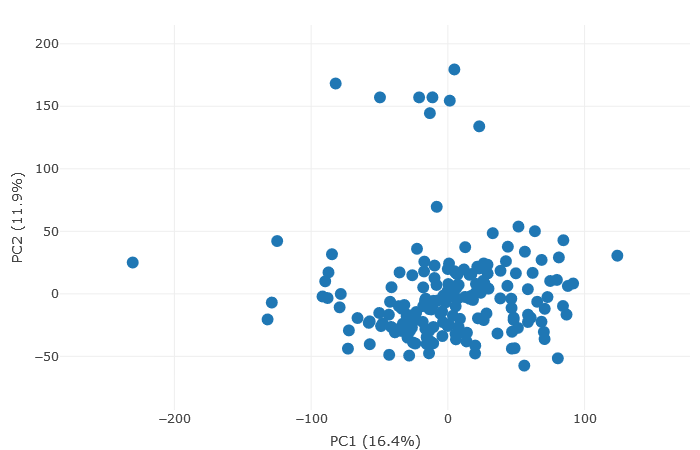

In [45]:
from IPython.display import Image
Image("pca_plot.png", width=700, height=800)

#### 2. What does the analysis say about the general behaviour of the different samples?

The primary aim of the analysis is to tell how the genes are transcribed (and how much?) in all the given samples. 
Since we have too many samples with too many genes, it would not be possible to plot the graph (for 183 dimensions). We are performing PCA, which reduces the complexity of the data by reducing the dimension while retaining as much information. 
The variation along the PC1 is more important than the variation along the PC2 and, variation along the PC2 is more important than the variation along the PC3 and so on. Highly correlated samples form clusters. The sample with unusual gene expression being on the sideline. 

The Scree plot is a graphical representation for showing the variation of each component [Here, we will not plot it because it’s not important in this context].


#### 3. Are the neuroendocrine tumors clearly separable from the adenocarcinoma tumors?-- Overlay the information from metadata column ‘histological_type_other’ on top of PCA plot and check if neuroendocrine tumors are separating out.

No, plotting the 'histological_type' on PC1 and PC2 does not give a clear explanation about the neuroendocrine tumors(fig. 1). But, after overlying the 'histological_type_other' on the PCA plot, it becomes clear, and we can see neuroendocrine tumors separating(fig. 2, fig 3), with a few exceptions. The exceptions are 1 sample of moderatrly differentiated ductal adenocarcinoma 60% + neuroendocrine 40%, and one smaple for poorly differntiated adenocarcinoma which fall into cluster of adenocarinoma.


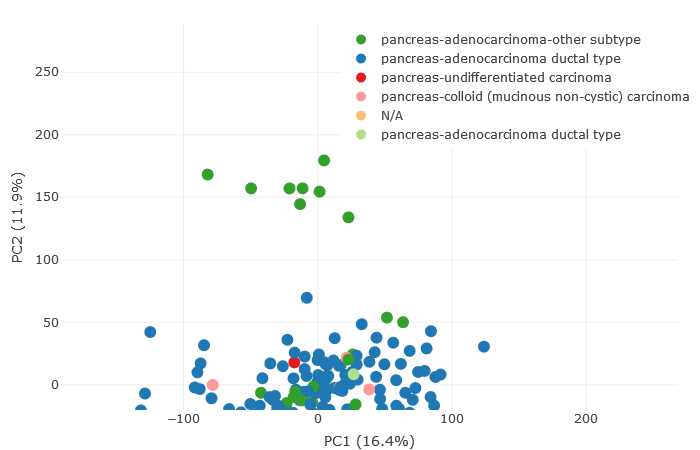

In [46]:
from IPython.display import Image
Image("histological_type_2.png", width=700, height=800)

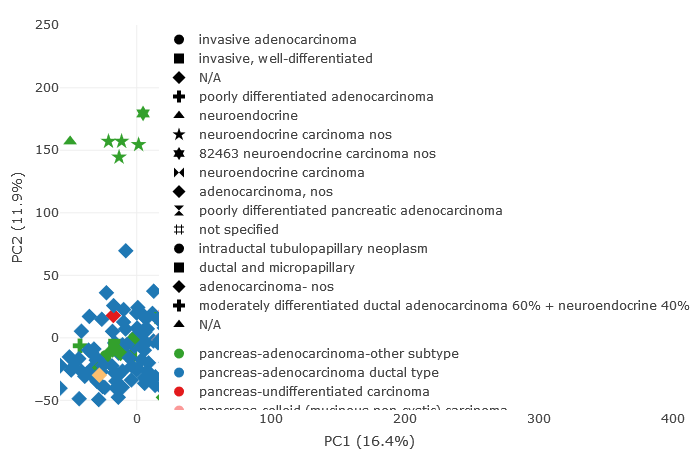

In [47]:
from IPython.display import Image
Image("neuroendocrine_tumors_2.png", width=700, height=800)

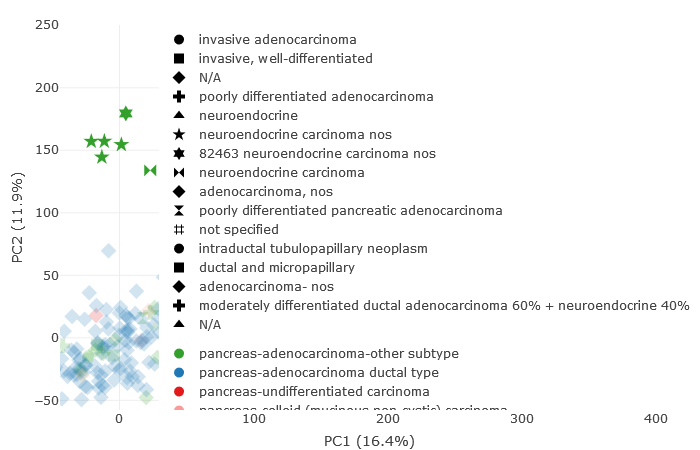

In [48]:
Image("neuroendocrine_tumors.png", width=700, height=800)

**Note:** By looking at the above figure, you might think that the sample with (green triangle maker) might belong to N/A type. That's not true because I have cross-validated it and it belongs to the neuroendocrine tumor. 

#### 4. What can be said about the variance of the PCA?

In our case, PC1 and PC2 capture around 28% of the total variation, which is good, given that there are 183 PCs and PC8 captures only 2.2% variation of the total variation. Here, our goal is separate Exocrine (adenocarcinoma) tumors and Neuroendocrine tumors. Once we layout the metadata information, we see that adenocarcinoma tumors primarily forming the cluster in the middle while another type of cancers separating along the PC1, (In other words gene transcription and expression is different among the type of cancer). We see that Neuroendocrine tumors forms cluster on the negative end of PC1 and a positive upper end of PC2. 

**Note:** PCA analysis with the whole data (Noisy Data), The PC1 catches a 13% variation among the data. With the cleaned data it is around 16.4%.

#### 5. Remove the neuroendocrine tumors from the dataset so that it contains only the adenocarcinoma tumor samples. The histology for the different tumor samples is contained in the GCT file.

By applying the filter in the Phantasus tool, we only select the adenocarcinoma tumor sample. Out of 183 samples, there are 175 samples for adenocarcinoma tumors. In the above figure, the orange-colored are Neuroendocrine tumors sample, by inverse selecting the column, we ensure that we have only selected adenocarcinoma tumor samples. 

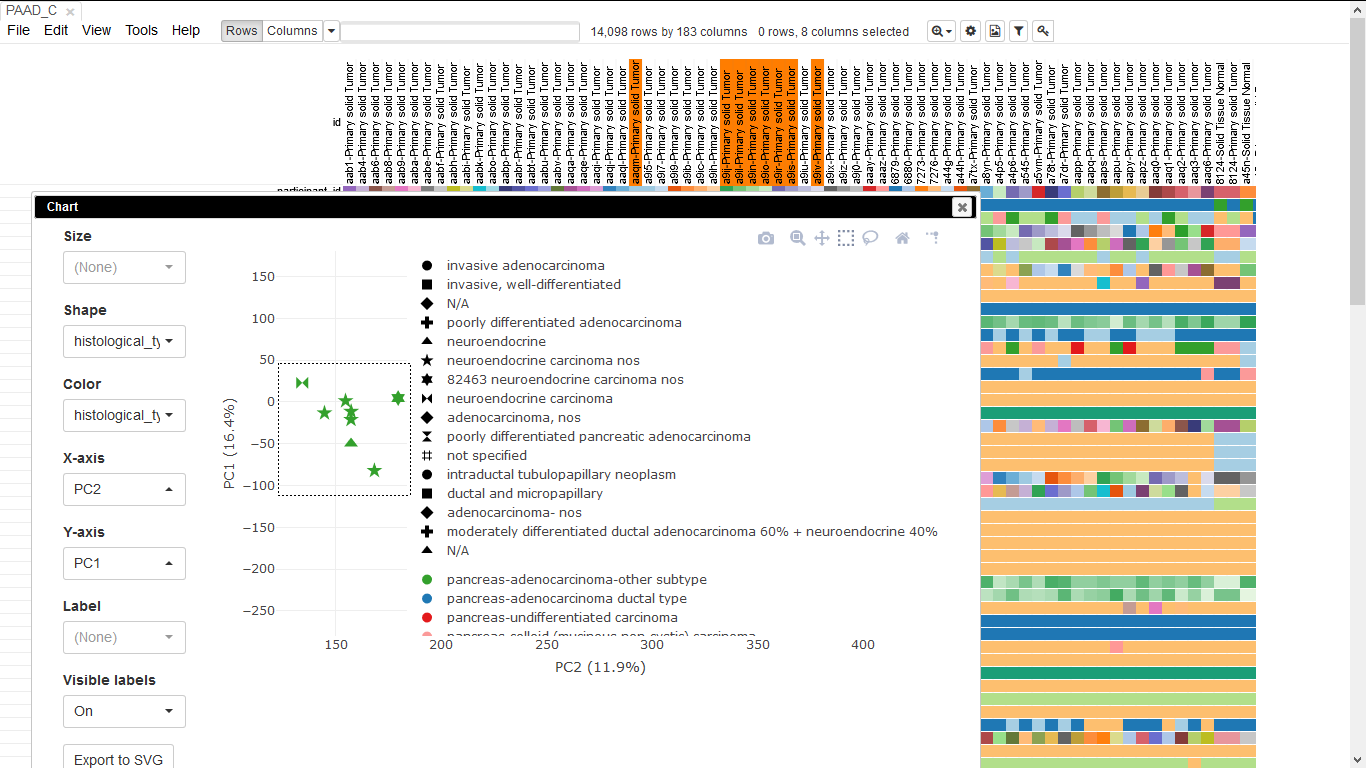

In [49]:
from IPython.display import Image
Image("remove.png", width= 1000, height= 800)

This data will be used in the third part of the assignment. 

### Drawbacks

1. I am not able to do the gene  set enrichment analysis. **Q3 part 2 & 3** are reamining, I wil l update as soon as possible. 
2. The Phanthasus tool does support the resizing of the plot, so visualization is not proper. I have tried to make it as clear as possible using multiple plot. 
3. I have tried to do the indepth analysis as much I can. However, If you find anything doubtful or disagree with my inference and conclusions, please let me know.
